In [2]:
import os
import numpy as np
#import urllib.request
import tweepy as tw
import pandas as pd
from pandas import *
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

/Users/user/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
consumer_key = 'DAgn9RUA95XG8JnF2ydmVfJTk'
consumer_secret = 'EnUToGTGDeqi9phcHRCMprKBheS0iQsYFzsKmratEzJNDX1ktq'
access_token = '3181144003-c0PSiV7uD717G0fNvPugiGBAYtICr5NNLKdk49Z'
access_token_secret = '0J63Vi6UNrI4wTBs1N1M5l5WUOEeZXfms8U3jwQEPkfQ5'


auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [44]:
tweets1 = open("/Users/user/Desktop/NU/510/tweetOld.txt", "r")

In [45]:
tweets = tweets1.readlines()

In [46]:
all_tweets = [tweet for tweet in tweets]

In [47]:
all_tweets[100]

'#WeAreBrows #Brows\n'

In [4]:
import csv

In [5]:
# search_term = "sephora -filter:retweets"

# tweets = tw.Cursor(api.search,
#                    q=search_term,
#                    lang="en",
#                    since='2019-04-21',
#                    until = '2019-04-25').items(1000)

# all_tweets = [tweet.text for tweet in tweets]

#os.chdir("/Users/yanghong/Documents/Class/socialMediaMining/")

tweets1 = open("/Users/user/Desktop/NU/510/tweetFinal.csv", "r")

tweets = tweets1.readlines()
all_tweets = [tweet for tweet in tweets]
def process_data(all_tweets):
    def remove_url(txt):
        """Replace URLs found in a text string with nothing
        (i.e. it will remove the URL from the string).

        Parameters
        ----------
        txt : string
            A text string that you want to parse and remove urls.

        Returns
        -------
        The same txt string with url's removed.
        """

        return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


    tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]

    # Create a sublist of lower case words for each tweet
    words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

    # Download stopwords
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

    # Remove stop words from each tweet list of words
    tweets_nsw = [[word for word in tweet_words if not word in stop_words]
                  for tweet_words in words_in_tweet]

    # Remove collection words
    collection_words = ['sephora']

    tweets_nsw_nc = ["".join(w + " " for w in word if not w in collection_words)
                     for word in tweets_nsw]
    new_tws = []
    for tw in tweets_nsw_nc:
        if len(tw.split()) > 5:
            new_tws.append(tw)
    return new_tws
    
    #stemming
   
    ps = PorterStemmer() 
   
    sentence = tweets_nsw_nc
    words = word_tokenize(sentence) 
    for w in words: 
        print(w, " : ", ps.stem(w))
    return words
corpus = process_data(all_tweets)
#print(corpus)
print(len(corpus))

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
5697


In [6]:
#print(all_tweets)
vectorizer = CountVectorizer()
 
X = vectorizer.fit_transform(corpus) 
#print(X)
print (len(X.toarray()[0]))
new_data = []
for row in X.toarray():
    new_data.append(row[5952:-1])
word = vectorizer.get_feature_names()  
word = word[5952:-1]
print (word) 



#print (X.toarray()) 

14403
[u'aa', u'aap', u'ab', u'abba', u'abbacchioagainover', u'abh', u'abhcosmetics', u'abhjunkiess', u'abhnigeria', u'abhobsession', u'abhprsearch', u'ability', u'able', u'abled', u'aboi', u'abroad', u'absence', u'absolu', u'absolute', u'absolutely', u'absorbing', u'abt', u'abysmal', u'ac', u'academic', u'academy', u'acc', u'accept', u'acceptab', u'accepted', u'accepting', u'access', u'accessory', u'accidental', u'accidentally', u'accom', u'accomplice', u'accompliceconcealer', u'accomplishing', u'according', u'accosted', u'accou', u'account', u'accounts', u'accs', u'accurate', u'accusing', u'aches', u'achieve', u'achievement', u'aching', u'acid', u'acne', u'acquadiparmagiftedme', u'acquire', u'acro', u'across', u'act', u'acting', u'action', u'activities', u'actresswhowhatwear', u'actual', u'actually', u'ad', u'ada', u'adam', u'add', u'added', u'addict', u'addicted', u'addiction', u'adding', u'additio', u'addition', u'additionally', u'addone', u'address', u'addressed', u'addresses', u'

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()  
print (transformer)  
 
tfidf = transformer.fit_transform(new_data) 
data = pd.DataFrame(tfidf.toarray(), columns= word)
data.to_csv('tfidf.csv', sep='\t', encoding='utf-8')
#data = pd.DataFrame(tfidf.toarray(),columns=wordFinal)
#print (len(tfidf.toarray()[0]))
#print (len(word))
#print (data)
#filtered_data = data[['im', 'makeup', 'get', 'like', 'norvina1', 'sale', 'check', 'good', 'beauty', 'new', 'go', 'please', 'need', 'moschino', 'one', 'amp', 'items', 'got', 'jobs', 'share', 'poshmarkapp', 'love', 'dont', 'loving', 'poshmark', 'know', 'us', 'time', 'make', 'fashion', 'ulta', 'want', 'store', 'ultabeauty', 'vib', 'really', 'products', 'foundation', 'card', 'going', 'skin', 'sephoras', 'fentybeauty', 'work', 'today', 'dm', 'style', 'points', 'brand', 'gift', 'fbbindia', 'rouge', 'buy', 'cant', 'thecrayoncase', 'see', 'yall', 'abhcosmetics', 'shades', 'try', 'shopmycloset', '2019', 'colorstv', 'send', 'email', 'always', 'went', 'use', 'think', 'order', 'would', 'look', 'shade', 'people', 'lol', 'girl', 'spring', 'black', '50', 'online', 'day', 'skincare', 'help', 'using', '20', 'first', 'back', 'thank', 'something', 'product', 'never', 'win', 'right', 'best', 'free', 'available', 'address', 'well', 'thanks', 'kit', 'shop', 'face', 'find', 'tried', 'could', 'samples', 'insider', 'things', 'recommendations', 'thats', 'miss', 'coming', 'artist', 'much', 'money', 'getting', 'excited', 'take', 'thing', 'someone', 'via', 'year', 'every', 'color', 'list', 'sorry', 'sun', 'also', 'ill', 'ready', 'oh', 'line', 'shopping', 'sample', 'give', 'cart', 'youre', 'registered', 'spent', 'full', 'stores', 'mac', 'yes', 'collection', 'even', 'feminamissindia', 'cosmetics', 'palette', 'come', 'literally', 'wanna', 'shit', 'buying', 'brands', 'sephoraindia', 'east', 'everything', 'friday', 'macys', 'ever', 'case', 'anything', 'care', 'rihanna', 'better', 'safety', 'play', 'cashier', 'looks', 'big', 'idea', 'stealing', 'retailers', 'set', 'happy', 'may', 'xonecole', 'omg', 'finally', 'didnt', 'bought', 'giveaway', 'amazing', 'inside', 'mall', 'enter', 'femina', 'damn', 'jeremy', 'since', 'guys', 'hope', 'put', 'purchase', 'hello', 'bag', 'walk', 'support', 'hi', 'havent', 'let', 'jcpenney', 'made', 'account', 'wait', 'wuzzamsupa', 'done', 'looking', 'spend', 'say', 'scott', 'stole', 'nordstrom', 'favorites', 'great', 'manager', 'fenty', 'starts', 'last', 'stuff', 'used', 'socialbflymag', 'regalmovies', 'jambajuice', 'bnbuzz', 'aemtb', 'daveandbusters', 'underarmour', 'working', 'sure', 'india', 'missindiaeast2019', 'trying', 'target', 'event', 'home', 'way', '100', 'came', 'lip', 'birthday', 'harveynichols', 'already', 'lot', 'crayon', 'urbandecay', 'favorite', 'week', 'gonna', 'around', 'another', 'credit', '60', '200', 'days', 'summer', 'beautiful', 'fuck', 'supa', 'doesnt', 'employee', 'assist', 'taking', 'weekend', 'feel', 'theyre', 'needs', 'hear', 'cream', 'video', 'whole', 'pay', 'bitch', 'egift', 'amazon', 'sales', 'real', 'gave', 'tomorrow', 'package', 'woman', 'theres', 'rewards', 'youtube', 'job', 'mask', 'many', 'toofaced', 'definitely', 'center']]
#filtered_data = data[['005', '042319', '0425', '0re0co0kie', '10', '100', '1000', '100th', '1015', '11', '114', '12', '1249', '125', '129', '12hr', '12piece', '13', '1300', '135', '14', '148', '15', '150', '1500', '16', '160', '1600points', '1690', '170419', '175', '17m', '18', '1800flowers', '190424', '194', '1993', '1am', '1click', '1k', '1st', '20', '200', '2000', '2006wtf', '201', '2015', '2016', '2018', '2019', '205', '21', '219', '22', '23', '234', '24', '2442019zhuyilong', '247', '25', '250', '26', '26th', '2day', '2european', '2much', '2subscribe', '30', '300', '3000', '30219', '3040', '32', '320', '34', '35', '35o', '39', '3babysitting', '3g', '3kg', '40', '400', '4192', '420', '426', '429', '4442', '48', '4sephora', '4th', '50', '500', '50s', '50shades', '510', '55', '555', '56', '5900', '5jobsihad', '5minute', '60', '611', '64', '65', '6509918119', '659', '68', '725', '730', '74', '750', '7500', '76th', '77', '7k', '80', '800', '82', '85', '8777374672', '89', '90', '900', '95', '970', '9ff0yhlglkfngcf', '9th', 'a8', 'aap', 'abba', 'abbyrartistry', 'abh', 'abhcosmetics', 'abhjunkiess', 'abhnigeria', 'abhobsession', 'able', 'aboubackry', 'absence', 'absolute', 'absolutely', 'abt', 'ac', 'acappella1913', 'accept', 'acceptab', 'accepting', 'access', 'accidentally', 'accom', 'according', 'account', 'accounts', 'accs', 'accurate', 'accusing', 'aches', 'achieve', 'achievement', 'acid', 'acne', 'acquadiparmagiftedme', 'acquire', 'acro', 'across', 'act', 'acting', 'activities', 'actor', 'actual', 'actually', 'ad', 'ada', 'adam', 'adamarilowpez', 'adamdidthat', 'add', 'added', 'addicted', 'addiction', 'adding', 'addition', 'address', 'addressed', 'adidas', 'adjust', 'admin', 'administra', 'administrative', 'administrativeprofessionalsday', 'adore', 'ads', 'adult', 'advance', 'advantage', 'advice', 'advisable', 'adviser', 'advisor', 'adweek', 'aemtb', 'aeroplan', 'af', 'affl', 'afford', 'affordable', 'afraid', 'african', 'afternoon', 'afterpay', 'afterschool', 'afterwork', 'ag', 'againnnnn', 'agarcha14', 'agave', 'age', 'agency', 'agent', 'ages', 'aggieburnett', 'aggravation', 'aging', 'ago', 'agree', 'agreed', 'ah', 'aha', 'ahem', 'ahhh', 'ahhhh', 'ai', 'aid', 'aide', 'aight', 'aint', 'aipowered', 'air', 'airpods', 'airwreckamtz', 'aisle', 'aisles', 'ajeeb', 'aka', 'akjadamua', 'aladdin', 'alamarcosmetics', 'alayenieq', 'alert', 'alex', 'algenist', 'alibaba', 'alisonminotti', 'alita007', 'aliyqhmua', 'allegedly', 'allergetic', 'allie', 'allieb8', 'alll', 'allll', 'allnighter', 'allow', 'allowing', 'allows', 'allthatjaz24', 'allur', 'allure', 'alluremagazine', 'ally', 'ally143redd', 'allyf91', 'allyiahsface', 'almost', 'alone', 'along', 'alpareena', 'already', 'alright', 'also', 'alsocait', 'alsooooo', 'alternative', 'althea', 'although', 'always', 'alyciacampos', 'amanda', 'amandamull', 'amaz', 'amazing', 'amazon', 'amazonowned', 'ambassador', 'amen', 'american', 'americana', 'amethyst', 'amika', 'among', 'amount', 'amp', 'amrezy', 'amts', 'anastasia', 'anastasiabeverlyhills', 'anastasiabrows', 'angeleyes12141', 'angelina', 'angry', 'annazissou', 'announce', 'announced', 'announcements', 'annoying', 'annual', 'another', 'answering', 'antibacterial', 'antiguideantihaul', 'ants', 'anxiety', 'anxiously', 'anybody', 'anymore', 'anymoreill', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'aoastudio', 'ap', 'apartment', 'apocalypse', 'apologize', 'app', 'apparently', 'apple', 'applestore', 'applied', 'applies', 'apply', 'appointment', 'appointments', 'appreciate', 'appreciated', 'approaching', 'appwebsite', 'apr', 'apricot', 'april', 'aprilplaybox', 'aquafierce', 'ar', 'arabia', 'arbitrarily', 'arbys', 'arent', 'argan', 'ari', 'ariana', 'ariataree', 'arielchristia', 'aris', 'arjunkanungo', 'arjunkanungos', 'arkit', 'arm', 'armani', 'arou', 'around', 'arrival', 'arrive', 'arrived', 'arrives', 'art', 'article', 'artist', 'artistcouture', 'artists', 'asap', 'asaphira', 'ashamed', 'ashley', 'asian', 'aside', 'ask', 'asked', 'asking', 'asks', 'asksienna', 'asos', 'ass', 'asshole', 'assist', 'assistance', 'assistant', 'associate', 'associatemua', 'associates', 'assumed', 'astroclea', 'atampt', 'ate', 'atipoaristide', 'atlgreekpicnic', 'atm', 'attacked', 'attend', 'attendant', 'attending', 'attention', 'attitudes', 'attorneys', 'attykate', 'auckland', 'audacity', 'audience', 'auntie', 'australia', 'authentic', 'authorize', 'authorized', 'autochi0', 'automatically', 'av', 'availabl', 'available', 'ave', 'avene', 'avengers', 'avenues', 'avid', 'avocado', 'awaiting', 'awaits', 'awarded', 'away', 'awesome', 'awfully', 'awry', 'awsten', 'aww', 'aye', 'ayejoyjoy', 'ayoolean', 'ba', 'babe', 'babes', 'baby', 'babysitter', 'babyyy', 'back', 'backend', 'background', 'backing', 'backtoschoolinspired', 'backup', 'bacteria', 'bad', 'badassbowden', 'badescu', 'badgalttee', 'badkokonut', 'badly', 'bag', 'bagel', 'bags', 'bahru', 'baht', 'baichungbhutia', 'baileekathleen', 'bakar', 'baked', 'bakerie', 'bakery', 'balance', 'baldwin', 'balm', 'bampb', 'ban', 'banana', 'bangelciaga', 'bank', 'bar', 'barbeejoirish', 'barcelona', 'bare', 'barely', 'barf', 'bargain', 'barista', 'barneysny', 'barrel', 'barrier', 'bars', 'bartender', 'base', 'baseball', 'basic', 'basically', 'basics', 'basket', 'bath', 'bathroom', 'batu', 'bauty', 'bay', 'bazzar', 'bb', 'bbmastopsocial', 'bc', 'bdavvis', 'bday', 'beachplease', 'bear', 'beat', 'beauiful', 'beaut', 'beauties', 'beautiful', 'beauty', 'beautybakerie', 'beautybay', 'beautyblender', 'beautyblogger', 'beautyboxfashion', 'beautybytamib', 'beautychickee', 'beautycommunity', 'beautyinsider', 'beautyjunkies', 'beautylish', 'beautymakeup', 'beautys', 'beautyskin', 'beautysplurgevssteal', 'beautyworks', 'became', 'becca', 'beccacosmetics', 'beccaskinlove', 'bed', 'bedroom', 'beechat', 'beepic', 'beeswax', 'beex103', 'befo', 'begin', 'beginners', 'begun', 'behavioral', 'behaviour', 'behind', 'behindthescenes', 'beijing', 'believe', 'belle', 'belleza', 'belong', 'belovedbaglady', 'beneath', 'benefit', 'benefitbeauty', 'benefitcosmetics', 'benefits', 'benparr', 'berenvm', 'berlin', 'bernardino', 'berries', 'best', 'bestbuy', 'bestie', 'bestiesboutiq', 'bestselling', 'bet', 'betmyheart', 'betta', 'better', 'betting', 'beverly', 'beyond', 'bflooo12', 'bha', 'bhabiedelu19', 'bhaichung15', 'bhcosmetics', 'biancabujan', 'biancarellidea', 'bicth', 'bieber', 'big', 'bigger', 'biggest', 'bigpapiabe', 'bill', 'billion', 'bills', 'binge', 'bio', 'biothermworld', 'birchbox', 'birth', 'birthday', 'biscuit', 'bish', 'bishieboi', 'bit', 'bitch', 'bitched', 'bitches', 'bitchhhh', 'bite', 'bitebeauty', 'bittyemerald923', 'bizness', 'bla', 'black', 'blackenterprise', 'blackgirlgonekb', 'blackgurltech', 'blackowned', 'blatantly', 'blemishes', 'blender', 'bless', 'blessed', 'blind', 'blink', 'blog', 'blogbabesrt', 'blogger', 'bloggerstribe', 'blogginggals', 'bloglovin', 'blogw', 'blogweb', 'blogwebs', 'blond', 'blondasian', 'bloom', 'bloomingdales', 'blow', 'blue', 'bluewater', 'blur', 'blush', 'blusher', 'blushhhhhh', 'bnbuzz', 'bo', 'boat', 'boba', 'body', 'bodyguard', 'bodylava', 'bodyskin', 'bogbeauty', 'bold', 'bomb', 'bonedry', 'bonita', 'bonus', 'boo', 'booboo', 'book', 'booked', 'boon', 'boost', 'boosters', 'bootlegsenshi', 'bootybytacobell', 'boring', 'boringexpensive', 'born', 'bornthisway', 'borrow', 'bosciaskincare', 'boston', 'botanicals', 'bother', 'bottle', 'bottles', 'bottom', 'bought', 'bounce', 'bound', 'bourjois', 'bout', 'bouta', 'boutique', 'bowser', 'box', 'boxycharm', 'boy', 'boycotting', 'boycottsephora', 'boyfriend', 'boyfriends', 'boys', 'br401', 'bradfo', 'brag', 'brakes', 'bramalea', 'bramtyjuliette', 'bran', 'branch', 'branches', 'brand', 'branded', 'brandonnbutt', 'brands', 'brandshad', 'brandt', 'brazilian', 'break', 'breaking', 'brenebrown', 'brg', 'briannaterese', 'brickell', 'bridal', 'bright', 'brighten', 'brighter', 'brightly50', 'brilliant', 'bring', 'bringing', 'brings', 'britishborn', 'britneychanelx0', 'brnuh', 'bro', 'broke', 'broken', 'brokeness', 'bron', 'bronxmua', 'bronze', 'bronzer', 'bronzers', 'bronzing', 'brookesnr', 'broooooooo', 'brought', 'brow', 'brown', 'brownthomas', 'brownxloud', 'brows', 'browsed', 'browser', 'browsing', 'bruh', 'brunch', 'brush', 'brushes', 'bts', 'btsarmymochi1', 'btstwt', 'btw', 'bu', 'bubuyoga', 'budget', 'build', 'buildings', 'built', 'bukit', 'bullshit', 'bumbleandbumble', 'bumbum', 'bummed', 'bunc', 'bunch', 'bunny', 'burger', 'burn', 'burned', 'bus', 'bushes', 'bushybrow', 'business', 'businesswoman', 'buuuuut', 'bux', 'buxom', 'buxomcosmetics', 'buy', 'buyblack', 'buyi', 'buying', 'buys', 'buzz', 'buzzceleb', 'buzzfeed', 'bwhahahahah', 'bye', 'bzotix', 'ca', 'cafe', 'caffeine', 'caiden', 'cait', 'caitisab', 'caityyxoxox', 'cake', 'caleb', 'calendula', 'call', 'called', 'calling', 'calm', 'cam', 'came', 'camera', 'cameras', 'camp', 'canada', 'canadian', 'canc', 'cancel', 'cancelled', 'cancer', 'cancercenter', 'candles', 'candy', 'canister', 'cannabis', 'cannot', 'cant', 'canyasmelll', 'cap', 'capital', 'capitalism', 'car', 'carbon', 'carbondale', 'card', 'cardboard', 'cards', 'care', 'career', 'carlaalicia26', 'carls', 'carolinedebenh1', 'carpet', 'carriecnh12', 'carrier', 'carry', 'carrying', 'cars', 'cart', 'cartierkth', 'carts', 'case', 'cases', 'cash', 'cashapp', 'cashback', 'cashier', 'cashiercolor', 'cashierphoto', 'cashwrap', 'casillasikers', 'cassl', 'cast', 'castmember', 'catch', 'catchar', 'catching', 'catchthisvibe', 'catierosesings', 'caudalie', 'caught', 'cause', 'caused', 'cave', 'cbelanoff', 'cc', 'ceeprado', 'celebrating', 'celebration', 'cell', 'cen', 'cent', 'center', 'centre', 'cents', 'cereal', 'certain', 'cestlavie504', 'cetaphil', 'cfirma', 'ch', 'cha', 'chains', 'chair', 'challenge', 'chance', 'chanel', 'change', 'changed', 'changer', 'changing', 'channel', 'chapstick', 'character', 'charcoali', 'charessa12', 'charge', 'charges', 'charlotte', 'chat', 'chatelet', 'chatted', 'chatting', 'chattypattysplc', 'che', 'cheap', 'cheaper', 'check', 'checked', 'checking', 'checkout', 'checks', 'cheers', 'cheery', 'chefresha', 'chemistry', 'chestnut', 'cheysc0', 'chiao', 'chic', 'chicago', 'chick', 'chief', 'child', 'childhood', 'childrens', 'chile', 'chilis', 'china', 'ching', 'chipmnk', 'chlodashian', 'chloecondon', 'chloemorello', 'chocolate', 'choose', 'chop', 'chopt', 'chose', 'chou', 'christ', 'christianthrif2', 'christmas', 'chrome', 'chunhtlong', 'chybug97', 'cinemas', 'circle', 'citizen', 'city', 'ckngratulations', 'cl', 'claim', 'claimin', 'clairessamack', 'clarify', 'clarifying', 'clarins', 'clarinsofficial', 'class', 'classes', 'claudinha', 'clean', 'cleaner', 'cleanser', 'cleansers', 'cleansing', 'clear', 'clearly', 'clerk', 'click', 'clicked', 'clicking', 'client', 'clients', 'clock', 'close', 'closest', 'closet', 'closing', 'clothing', 'club', 'clubsephora', 'clue', 'cmon', 'co', 'coach', 'cocoa', 'coconut', 'code', 'codes', 'coffee', 'coins', 'col', 'coll', 'collab', 'collaborated', 'collaborating', 'collecting', 'collectio', 'collection', 'collections', 'college', 'cologne', 'color', 'colors', 'colorstv', 'colou', 'colour', 'colouriq', 'colourpop', 'colourpopco', 'colours', 'columbus', 'com', 'combine', 'combo', 'come', 'comes', 'comfort', 'comin', 'coming', 'comingamp', 'comment', 'commercial', 'commissions', 'commit', 'comms', 'communications', 'community', 'compact', 'companies', 'company', 'comparable', 'compare', 'compares', 'comparisons', 'complaining', 'complaint', 'completely', 'complexion', 'complicit', 'components', 'compra', 'computer', 'con', 'conc', 'conceal', 'concealer', 'conceler', 'concept', 'concepts', 'concerned', 'concerning', 'concert', 'concession', 'concierge', 'conclusion', 'condition', 'conditioner', 'conditions', 'conference', 'confidence', 'confirm', 'confused', 'confusion', 'conglomerate', 'congrats', 'congratulate', 'congratulations', 'connection', 'cons', 'conscious', 'consider', 'considered', 'considering', 'consist', 'constant', 'consultant', 'consumption', 'contact', 'contacted', 'contacting', 'contains', 'contamination', 'contest', 'continents', 'continue', 'continued', 'continues', 'continuing', 'controversy', 'convenience', 'conventional', 'conversion', 'convince', 'coo', 'cook', 'cookserver', 'cool', 'coolest', 'cooling', 'coolwarmneutral', 'cooperation', 'coordin', 'coordinator', 'copied', 'copowered', 'copy', 'copying', 'cora', 'coralynette', 'cormac', 'corner', 'corporation', 'corrector', 'corresponding', 'corrupted', 'corrynarryana', 'cos', 'cosmetic', 'cosmetics', 'cosmetologist', 'cosrx', 'cost', 'costco', 'costs', 'costumed', 'costumers', 'cough', 'coul', 'could', 'couldnt', 'couldve', 'counselor', 'count', 'counter', 'counting', 'countmystars', 'countries', 'country', 'county', 'couple', 'coupon', 'couponcommunity', 'coupons', 'courier', 'cours', 'course', 'courtblackburn', 'courtesy', 'couture', 'cover', 'coverage', 'covergirl', 'covering', 'covers', 'coveted', 'coworker', 'coworkers', 'cpb09412690', 'crack', 'cracked', 'cracker', 'craft', 'crafting', 'crap', 'crayola', 'crayolas', 'crayon', 'crayoncase', 'crayons', 'crazy', 'cream', 'creamlike', 'creams', 'creaseless', 'create', 'created', 'creating', 'creative', 'creatives', 'creativity', 'credit', 'crem', 'crime', 'criminal', 'cristina9985', 'criteo', 'crmc2019', 'crossed', 'crossiron', 'crossposting', 'crowd', 'crowded', 'crucial', 'cry', 'crying', 'crystal', 'crystalpanics', 'crystalpoppinn', 'crystalwhips', 'csbxefct1013', 'ct', 'ctilburymakeup', 'cult', 'cultbeauty', 'cultural', 'culture', 'cupcake', 'curated', 'curiosity', 'curious', 'curl', 'curls', 'curly', 'current', 'currently', 'cushion', 'custom', 'custome', 'customer', 'customers', 'customs', 'cut', 'cute', 'cutting', 'cuz', 'cvs', 'cvspharmacy', 'cvsthe', 'cyancrusader', 'cynitsyours', 'cypherlords', 'daaaamn', 'dad', 'dadezeero', 'daggums', 'daily', 'dairy', 'dairyfree', 'daisy', 'daisygranado02', 'daisymarquez', 'dalybeauty', 'dam', 'damage', 'damaged', 'dameshorrell', 'dammit', 'damn', 'damp', 'dananmuller', 'dance', 'dancing', 'danibeaute', 'danimansuttii', 'danish', 'dapper', 'dar', 'dare', 'dark', 'darkcircles', 'darker', 'darkest', 'darn', 'dashlane', 'data', 'database', 'date', 'dates', 'dating', 'daughter', 'daughters', 'daveandbusters', 'davelackie', 'day', 'dayre', 'days', 'daysnext', 'dayuuuuuum', 'dayyofbeingwild', 'dcwhite215', 'de', 'deal', 'deals', 'dealsplus', 'dear', 'dears', 'death', 'debit', 'debiting', 'debt', 'debut', 'debuted', 'debuts', 'decay', 'deceased', 'decent', 'decide', 'decided', 'decides', 'deciding', 'decorator', 'deduct', 'deducted', 'dee', 'deedoubleu', 'deep', 'deeper', 'deets', 'defined', 'definitely', 'defying', 'degrees', 'dehydrated', 'del', 'delay', 'delayed', 'delete', 'deleting', 'deli', 'delive', 'deliver', 'delivered', 'delivery', 'deluxe', 'demand', 'demanding', 'demo', 'demographic', 'demonologies', 'denise10', 'dennis', 'denona', 'dental', 'denton', 'deny', 'department', 'depending', 'deployments', 'depot', 'dept', 'derived', 'describe', 'description', 'descriptions', 'desert', 'deserve', 'deserves', 'deserving', 'design', 'designconcepts', 'designed', 'designer', 'designermedia', 'designs', 'desireanne', 'desk', 'despite', 'destinations', 'detail', 'detailed', 'details', 'detract', 'devastated', 'devil', 'dewy', 'dezalina', 'di', 'dial', 'diamondjeweler', 'dianachantel', 'didnt', 'die', 'diego', 'differen', 'difference', 'different', 'digital', 'dillards', 'dilly', 'dine', 'dinner', 'dior', 'diorshow', 'dip', 'dipbrow', 'direct', 'directly', 'director', 'dis', 'disappeared', 'disappearing', 'disappointed', 'disappointing', 'discontinued', 'discount', 'discounts', 'discover', 'discovered', 'discuss', 'discusses', 'disease', 'disgusting', 'disney', 'disneyland', 'display', 'displayed', 'disrespected', 'disrespectful', 'disrupt', 'distance', 'distasteful', 'distressing', 'diyar', 'djari328', 'djokovic', 'djuliciouscosme', 'dm', 'dmasterflex000', 'dobby', 'doc', 'doctor', 'doctors', 'dodo', 'doesnt', 'dog', 'dois', 'dolatshahisara', 'dolce', 'dollar', 'dollars', 'dollas', 'dominos', 'domme', 'donate', 'donating', 'done', 'dont', 'donuts', 'door', 'doorstep', 'dope', 'doshapp', 'doshocked', 'double', 'doubt', 'doused', 'douzmanian', 'download', 'downs', 'dp', 'dpmallsemarang', 'dq', 'dr', 'draft', 'drag', 'dragging', 'dragon', 'drawer', 'drawing', 'draws', 'drdennisgross', 'dream', 'dreamed', 'dreams', 'dress', 'drfredricbrandt', 'dries', 'drill', 'drink', 'drinks', 'drive', 'driveway', 'drjengunter', 'drk', 'drop', 'dropped', 'drops', 'drug', 'drugstore', 'drunk', 'drunkelephant', 'drunken', 'dry', 'ds', 'dssilverpearls', 'dsw', 'dtc', 'dubai', 'duct', 'dude', 'due', 'dumb', 'dumbass', 'dunkin', 'dunkindonuts', 'duo', 'duplicate', 'dust', 'dying', 'ea', 'eagle', 'earlier', 'earliest', 'early', 'earn', 'earth', 'eas', 'easier', 'easily', 'east', 'easter', 'easy', 'ebay', 'edge', 'editing', 'edition', 'editors', 'educate', 'educating', 'education', 'educator', 'educators', 'eeeevery', 'effort', 'egg', 'eggsactlythats', 'egi', 'egift', 'egsephora', 'either', 'ejanereed', 'el', 'elderberry', 'elderly', 'electronics', 'elemis', 'elephant', 'elfcosmetics', 'eligibility', 'elise', 'ella', 'elle', 'elliavrram', 'else', 'elsewhere', 'elutajobs', 'elz309', 'em', 'email', 'emailing', 'emails', 'embarrassing', 'emmajocelynn', 'emolga', 'emotional', 'emotions', 'employee', 'employees', 'empressearwig', 'emptiness', 'empty', 'en', 'enabling', 'encourage', 'encouraging', 'end', 'endcap', 'ended', 'endgame', 'endorphynn', 'ends', 'energetic', 'england', 'enjoy', 'enlightened', 'enoug', 'enough', 'ensconced', 'ensing', 'ensure', 'enter', 'entered', 'enterprise', 'entertainer', 'entertainment', 'entire', 'entirely', 'entre', 'entrepreneur', 'entry', 'envelopes', 'envisioning', 'epic', 'epically', 'episode', 'equally', 'equivalent', 'eraser', 'eretailersummit', 'erinkrakow', 'erins626', 'error', 'eshagupta', 'eshagupta2811', 'esp', 'especially', 'essay', 'essence', 'essense', 'essentials', 'est', 'este', 'esteelauder', 'esteem', 'estellaquinonez', 'esthet', 'esthetician', 'eta', 'etc', 'ethandolan', 'etude', 'eugene', 'europe', 'european', 'ev3lynbaker', 'evacuated', 'evalamorte', 'eve', 'evelom', 'even', 'evening', 'event', 'ever', 'eversince', 'every', 'everybody', 'everybodys', 'everyday', 'everyone', 'everyones', 'everyt', 'everything', 'everythings', 'everytime', 'everywhere', 'ewheeelz', 'exact', 'exactly', 'example', 'examples', 'exasperatedexhibit', 'exc', 'except', 'exceptionalahead', 'excessiv', 'excessive', 'exchange', 'exci', 'excited', 'excitement', 'exclusive', 'exclusively', 'exclusiveoffer', 'excuse', 'execute', 'executive', 'exfol', 'exist', 'existence', 'existing', 'exists', 'expand', 'expect', 'expenditures', 'expensive', 'expensiveme', 'experience', 'experiences', 'experiment', 'expert', 'expired', 'explain', 'explanation', 'express', 'expression', 'extension', 'extensions', 'extra', 'extract', 'extras', 'extreme', 'extremely', 'eye', 'eyeballs', 'eyebrow', 'eyebrows', 'eyegel', 'eyelash', 'eyelashees', 'eyelashes', 'eyeliner', 'eyes', 'eyeshadow', 'eyeshadowpalette', 'eyn', 'fa', 'fabletics', 'fabric', 'fabulous', 'face', 'faced', 'faceforwardskin', 'facelip', 'faces', 'facial', 'facials', 'failed', 'faintingmeg', 'fair', 'fairlight', 'fairlyliterary', 'faithful', 'fake', 'fakes', 'falcon111glinda', 'fallforaut', 'falls', 'falsies', 'fam', 'familiar', 'family', 'fan', 'fantastic', 'fantasy', 'far', 'farm', 'farmacy', 'farrahzali', 'fart', 'fashion', 'fashionable', 'fast', 'fat2019', 'fave', 'faves', 'favori', 'favorite', 'favorites', 'favoritesbundle', 'favourite', 'favourites', 'favs', 'fb', 'fbbindia', 'fck', 'fe', 'fear', 'fearlessly', 'feat', 'feature', 'featured', 'featurepoints', 'featuring', 'fee', 'feed', 'feedback', 'feedly', 'feel', 'feelikex', 'feeling', 'feels', 'feeluniquefr', 'fees', 'fellow', 'felt', 'fem', 'femalebloggerrt', 'femina', 'feminamissindia', 'femmes', 'fenty', 'fentybeauty', 'fentybeautyif', 'fentybeautynow', 'fetisheyes', 'fierc', 'fierce', 'fiery', 'fight', 'fighting', 'figure', 'files', 'filled', 'filming', 'filters', 'fin', 'finale', 'finalize', 'finally', 'financially', 'find', 'finder', 'finding', 'finds', 'fine', 'finefragrance', 'finesse', 'fingerprints', 'fingers', 'fingertips', 'finish', 'finna', 'fire', 'fireheartblazey', 'fireplace', 'firm', 'firmly', 'firs', 'first', 'fish', 'fit', 'fitbit', 'fits', 'fitset', 'five', 'fivever', 'fix', 'fixed', 'fixmysocial', 'fkn', 'flags', 'flattered', 'flattery', 'flawless', 'flight', 'flippen', 'floor', 'florida', 'flower', 'flowers', 'flowery', 'fluid', 'flutterlashes1', 'fly', 'flyicarus', 'flying', 'fo', 'focus', 'folk', 'follow', 'followed', 'following', 'food', 'foods', 'foot', 'forbes', 'force', 'forced', 'foreground', 'forever', 'forever21', 'forever35pod', 'forget', 'forgets', 'forgetting', 'forgot', 'form', 'formal', 'formaldehyde', 'forms', 'formula', 'formulation', 'forward', 'fossil', 'fou', 'foul', 'foulest', 'found', 'foundat', 'foundati', 'foundation', 'foundations', 'foundcealer', 'founder', 'fountain', 'four', 'fourth', 'fourthraybeauty', 'fq2019', 'fr', 'fragrance', 'fragrances', 'fragrant', 'france', 'francescas', 'franchises', 'francisco', 'frank', 'fraudswont', 'freakin', 'freaking', 'free', 'freelance', 'freely', 'freeshrugs', 'freeze', 'french', 'fresh', 'freshen', 'frfugthong', 'friday', 'friend', 'friends', 'fro', 'fromkiehls', 'front', 'frozen', 'fruit', 'frustrating', 'ft', 'fu', 'fubu', 'fuck', 'fucked', 'fuckin', 'fucking', 'full', 'fulla', 'fullbody', 'fuller', 'fullswing', 'fully', 'fuming', 'fun', 'function', 'fund', 'funny', 'funserendipity', 'furt', 'furth', 'future', 'futuredurham', 'fx', 'fxck', 'fyi', 'g17rv', 'gabbana', 'gabbyt90', 'gah', 'gallery', 'game', 'gamechanger', 'gameofthrones', 'gamergalproblem', 'gap', 'gaps', 'garbage', 'garbagexhuman', 'garden', 'gaskells', 'gasp', 'gathering', 'gave', 'gc', 'ge', 'geefrodo', 'geez', 'gel', 'gemmabarrettmua', 'gender', 'genius', 'gentrify', 'genuine', 'genworth', 'gerardcosmetics', 'get', 'geteven', 'getget', 'gets', 'getting', 'ghetto', 'giants', 'gift', 'giftcards', 'gifted', 'gifts', 'gimme', 'gingerbelle74', 'ginzing', 'giraffes', 'girl', 'girlfriend', 'girls', 'girrrrllllll', 'girrrrrl', 'give', 'giveaway', 'given', 'gives', 'giving', 'glaci', 'glad', 'gladly', 'glam', 'glamazon1026', 'glambymykaila', 'glamor', 'glamorous', 'glamourbyneela', 'glassskin', 'gleimmatthew', 'glendale', 'glishaxnadine', 'glit', 'glitch', 'glitching', 'glitter', 'gloss', 'glosses', 'glossier', 'glow', 'glowinducing', 'glowing', 'glowkit', 'glowrecipe', 'glue', 'gnlaine', 'gntm', 'go', 'god', 'goddammit', 'goddess', 'godivachocolat', 'gods', 'godsgift', 'goes', 'goin', 'going', 'gold', 'golde', 'golf', 'gon', 'gondola', 'gone', 'gonna', 'good', 'goodbye', 'gooddyeyoung', 'goodies', 'google', 'goooood', 'gorgeous', 'gorgoeus', 'got', 'gotta', 'gotten', 'grab', 'grabbed', 'grabs', 'grad', 'graduate', 'graduated', 'grail', 'gram', 'grammar', 'grand', 'granddaughter', 'grandelash', 'graphic', 'grateful', 'gratitude', 'graysondolan', 'greasy', 'great', 'greatest', 'green', 'greet', 'greetercashier', 'greets', 'gretchenrubin', 'grip', 'grlpwr', 'grocery', 'grossnoely', 'groun', 'group', 'grouphome', 'grow', 'grwm', 'gt', 'guarded', 'guess', 'guide', 'guilty', 'gurl', 'gurry', 'guru', 'gutted', 'guy', 'guys', 'gym', 'gymnastic', 'gynos', 'ha', 'haaa', 'haaaaalp', 'haaaate', 'habit', 'habits', 'hacks', 'hadhave', 'haha', 'hahaha', 'hahahah', 'hailey', 'hair', 'haircare', 'haircut', 'hairspray', 'half', 'halfcrazy', 'halles', 'hallmarkchannel', 'halloween', 'hampm', 'hand', 'handling', 'hands', 'hang', 'hanging', 'haojoonxing', 'happen', 'happened', 'happening', 'happens', 'happiness', 'happy', 'happygirl', 'harassment', 'hard', 'harder', 'hardly', 'hardto', 'harveynichols', 'hasnt', 'hate', 'hates', 'haul', 'hauls', 'havent', 'haves', 'havi', 'hay', 'hayley', 'hazel', 'head', 'headquarters', 'heal', 'health', 'healthy', 'hear', 'heard', 'heart', 'hearthpgh', 'heartslyt', 'heaven', 'heavenly', 'heavier', 'heck', 'hectic', 'hehe', 'held', 'helenmccarthy', 'hell', 'helle', 'hellll', 'hello', 'hellsite', 'help', 'helped', 'helpful', 'helping', 'helps', 'henricksen', 'henriquegg', 'heralding', 'herbivore', 'herbivores', 'heregtgt', 'heres', 'heroingredient', 'hes', 'hey', 'heylee1423', 'heyrouge', 'hhhhhhhhhhh', 'hi', 'hide', 'high', 'highadherence', 'highend', 'highlight', 'highlighter', 'highlighters', 'highlights', 'highlyrecognised', 'hilarious', 'hills', 'hire', 'hiring', 'historically', 'hit', 'hittin', 'hmmmm', 'ho', 'hoarder', 'hoe', 'hoes', 'hold', 'holiday', 'hologramswift', 'holy', 'holyyyy', 'home', 'homecoming', 'homegirl', 'homeless', 'honestly', 'honey', 'honeymoon', 'hong', 'hoodrat', 'hookah', 'hooters', 'hop', 'hope', 'hopefully', 'hopes', 'hoping', 'horia', 'horrible', 'horse', 'horseback', 'hortons', 'host', 'hostess', 'hostesswaitress', 'hosting', 'hot', 'hotel', 'hottest', 'hour', 'hours', 'house', 'housecalls', 'housekeeper', 'hover', 'howbradly', 'howd', 'however', 'howwww', 'hpsvanessa', 'hr', 'hstrong', 'hsu', 'hub', 'huda', 'hudabeauty', 'hudson', 'huge', 'huh', 'hulu', 'hum', 'humid', 'hundreds', 'hunt', 'hunteryharris', 'huntimma', 'huntythat', 'hurry', 'hurt', 'hurts', 'husband', 'huttonpascale', 'hybrid', 'hydramist', 'hydrate', 'hydrates', 'hydrating', 'hydro', 'hype', 'hypedupmakeup', 'hyper', 'hyperrelevant', 'hyvee', 'iam', 'iamjeremyscott', 'iamkatori', 'iamshawnieee', 'icanfixxthat', 'ice', 'iced', 'icon', 'iconic', 'id', 'idea', 'ideas', 'identical', 'identify', 'idk', 'idoheartfailure', 'ifc', 'ig', 'ignited', 'ignored', 'ihop', 'ii', 'ikea', 'ill', 'illinois', 'illusion', 'illwayne', 'ilveyou', 'ily', 'im', 'imag', 'imagine', 'imitation', 'imma', 'immediately', 'impact', 'impatient', 'impending', 'important', 'impossible', 'impress', 'impressed', 'impressions', 'imsephora', 'ina', 'inapp', 'inc', 'inch', 'include', 'includes', 'including', 'inclusive', 'inclusivity', 'income', 'inconvenience', 'increased', 'incredible', 'incubating', 'indemand', 'indep', 'india', 'indicate', 'indonesia', 'indulge', 'industry', 'ineffective', 'inefficient', 'infection', 'infectious', 'influen', 'influencer', 'influencers', 'info', 'informat', 'information', 'informationadmissions', 'infront', 'ingredient', 'ingredientfocused', 'ingredients', 'initial', 'ink', 'inkey', 'inky', 'innisfree', 'innovative', 'input', 'inr', 'inside', 'insider', 'insist', 'inspiration', 'inspirational', 'inspired', 'insta', 'instagram', 'instagramvsreality', 'instant', 'instantuition', 'instantuitionsg', 'instead', 'instore', 'instructional', 'instructor', 'insurance', 'intense', 'intensive', 'interaction', 'interactions', 'interested', 'intern', 'internationally', 'intimidating', 'intrigued', 'invest', 'invested', 'investing', 'invite', 'invited', 'ipfs', 'ipsy', 'ipy', 'iq', 'ireland', 'irl', 'irmafletcher77', 'ironwoman0318', 'irritated', 'irskullbeard', 'iseeyou', 'islandglow', 'isnt', 'issue', 'issued', 'italian', 'italy', 'itcosmetics', 'item', 'items', 'itll', 'itsbl0ndie', 'itsjeremyscott', 'itsnicksnider', 'itssephora', 'itsslang', 'itstrishyyy', 'itunes', 'iturban', 'ive', 'ivykungu', 'izzyzzyzzy', 'jacked', 'jackie', 'jackieaina', 'jacking', 'jaclynhill', 'jacobs', 'jaiden', 'jaimiegradus', 'jalan', 'jalexandermoore', 'jam', 'jamaica', 'jamba', 'jambajuice', 'jamescharles', 'jamiepbeauty', 'jamievolved', 'jampr', 'janetsjargon', 'jar', 'jas', 'jaschumac', 'jasminemarie8', 'javonchanel', 'jay20counting', 'jayrose96', 'jbhifi', 'jc', 'jcp', 'jcpenney', 'jcpenny', 'jcrichman', 'jd', 'jdunc923', 'jealous', 'jefflikefeff', 'jeffree', 'jeffreestar', 'jeffreestarcosmetics', 'jelly', 'jelz127', 'jennytfhp', 'jeremy', 'jeremyscott', 'jerks', 'jersey', 'jessicabxts', 'jessicacalvello', 'jessicagoldstei', 'jessiflygirl', 'jessoncrack', 'jesus', 'jewel', 'jeweler', 'jeweller', 'jim', 'jimmietheripper', 'jlfelicity', 'jo', 'joanns', 'job', 'jobs', 'jodiwilliams', 'joes', 'johnbattelle', 'johnson', 'johor', 'join', 'joini', 'joining', 'joint', 'joke', 'jokes', 'jom', 'jon', 'jones', 'jonnaayyy', 'jordan', 'jordanpage', 'josie', 'josiemaran', 'josieskocik', 'journals', 'journeys', 'joy', 'jplantfairy', 'jpomaikalani', 'jr', 'juan', 'judge', 'judges', 'juice', 'juicebeauty', 'julie', 'juliemadeleine', 'juliepot', 'july', 'jumped', 'junepurrr', 'jung', 'jungkooks', 'junkie', 'junkies', 'jus', 'justeenantonio', 'justforthem3', 'juviasplace', 'kaittkatt', 'kaleighfaz', 'kalinanojutsu', 'kammytaughtyou', 'kanaya', 'kane', 'karah', 'karalyn', 'karalynnxxx', 'kat', 'kate', 'katelynmcmanus', 'kathleenlights1', 'kathyrivas1024', 'kattiekatte', 'katvond', 'katvondbeauty', 'kay', 'kc2sjm', 'keeblerorganelf', 'keep', 'keepingupwcutty', 'keeps', 'kelley08perry', 'kelliallen1d', 'kelly', 'kelseycook', 'kendallm346gmail', 'kendo', 'kept', 'kese', 'kettering', 'key', 'keysknohow', 'khandelwal', 'khandure', 'khiels', 'kicks', 'kid', 'kids', 'kiehls', 'kiissmydimples', 'kiko', 'kikomilanofr', 'kill', 'kimberpardue', 'kind', 'kinda', 'kindly', 'king', 'kira', 'kirsten2895nz', 'kirstyjbrown', 'kit', 'kitkatpr', 'kitreview', 'kits', 'kitty', 'kiwirc89', 'kiyashaco', 'kiyomi1028', 'kjbennettbeauty', 'kl', 'klstew97', 'kmarie346', 'kmart', 'knew', 'kno', 'knock', 'knockoff', 'know', 'knowing', 'knows', 'knoxville', 'knw', 'ko', 'kong', 'koraorganics', 'koreanbeauty', 'kourtney', 'kristenxleanne', 'kryskhronicles', 'kurlykay', 'kush', 'kuwait', 'kvdbeauty', 'kvdevils', 'kyle', 'kylie', 'kyliecosmetics', 'la', 'label', 'labs', 'lacewilliams', 'lacquer', 'lacquers', 'ladies', 'lady', 'lagirl', 'lagirlusa', 'lahrisa', 'lakarig18', 'lamboxdhcf', 'lamer', 'lanaisaway', 'lancme', 'lancomeusa', 'land', 'lanebryant', 'laneigekr', 'language', 'lanipastrami', 'large', 'largest', 'larp', 'lartiste', 'lasership', 'lash', 'lashes', 'lasplashsg', 'last', 'lasted', 'lasting', 'lasts', 'late', 'lately', 'later', 'latest', 'latina', 'lauder', 'launc', 'launch', 'launched', 'launches', 'launching', 'laundry', 'laura', 'lauramercier', 'laurask', 'laurasviews', 'laurent', 'laurentaylor', 'laurizyyy', 'lava', 'lavenderflor', 'lavo', 'law', 'lawless', 'laws', 'lawsuit', 'lax', 'layout', 'lazada', 'laziness', 'lazy', 'lazylazyme', 'lcooney', 'le', 'lead', 'leader', 'leading', 'learn', 'learned', 'learnt', 'leasing', 'least', 'leave', 'leaving', 'led', 'ledge', 'leesha', 'left', 'leg', 'legal', 'legally', 'legend', 'legendofheather', 'legit', 'lego', 'lend', 'les', 'less', 'let', 'lets', 'letter', 'letterbox', 'letting', 'level', 'levels', 'levi', 'lewiscapaldi', 'lexaproluvr', 'lexeianna', 'lexibeck', 'lexxorciist', 'li', 'liar', 'libby', 'liberata', 'licensed', 'lid', 'life', 'lifeguard', 'lifetime', 'light', 'lighter', 'lightest', 'lighting', 'lightweight', 'lik', 'like', 'liked', 'likegoblehobllegonlegoblegobblegonle', 'likely', 'likes', 'likeyou', 'liking', 'lil', 'lilahsturges', 'lilblueboxox', 'lillebaby', 'limecrime', 'limited', 'limitededit', 'limiting', 'line', 'liner', 'lines', 'link', 'linkedin', 'linluv5', 'linzstanley', 'lip', 'lipbalm', 'lipgloss', 'lipglosses', 'lippie', 'lips', 'lipstain', 'lipstains', 'lipstick', 'lipsticks', 'lipstories', 'liqui', 'liquid', 'liquidmattelipsticks', 'liquor', 'lisamei62', 'lisboa', 'list', 'list2019', 'listed', 'listen', 'listeners', 'lists', 'lit', 'lite', 'literal', 'literally', 'little', 'littlereminder', 'live', 'lived', 'lives', 'living', 'livingproofinc', 'livingyourlove', 'ljcc', 'lkilpatrickmpro', 'lmao', 'lmaoooo', 'lmfao', 'lmfaooo', 'lo', 'loaded', 'loan', 'local', 'locate', 'located', 'location', 'locations', 'logge', 'logged', 'login', 'logistics', 'logisticsnerd', 'lol', 'loladesue', 'lolitabot613', 'loll', 'lolol', 'lols', 'lon', 'london', 'long', 'longer', 'longlasting', 'longwear', 'longwearing', 'look', 'looked', 'lookin', 'looking', 'looks', 'loose', 'loral', 'lordmerii', 'lords', 'lorealparis', 'loricidedoom', 'los', 'lose', 'loss', 'lost', 'lot', 'lotion', 'lots', 'loughlinonline', 'lourd', 'love', 'loved', 'lovely', 'lovelyalecia12', 'lovemetender9', 'loveplease', 'lovers', 'loves', 'loving', 'lovisa', 'low', 'lowdown', 'lower', 'lowkey', 'loyal', 'loyalty', 'lt3', 'lty316', 'lu', 'luck', 'luckily', 'lucky', 'luiqapyt', 'lululemon', 'lunch', 'lurve', 'lush', 'lust', 'luster', 'luvving', 'luxe', 'luxiebeauty', 'lvmh', 'lvmhowned', 'lying', 'mac', 'macam', 'macarenaxx', 'macawcaw123', 'maccosmetics', 'macfarlame', 'machine', 'macys', 'mad', 'madamenoire', 'made', 'madiberrrnard', 'madonna', 'madonnas', 'magacovfefe2020', 'magic', 'magical', 'magnifique', 'magnitude', 'maham', 'maiab', 'maid', 'mail', 'mailing', 'main', 'maintenance', 'maison', 'major', 'make', 'makeover', 'makeovers', 'maker', 'makes', 'makeup', 'makeupartist', 'makeupbynadia13', 'makeupdater', 'makeupforeveracademy', 'makeupforeverpro', 'makeupoftheday', 'makeuprevolution', 'makeuprevusa', 'makeupshopping', 'makeuptest', 'makfj9', 'making', 'malariew', 'male', 'malicat82', 'mall', 'malls', 'malone', 'mamaswolley', 'mampg', 'man', 'managed', 'manager', 'managerlanham', 'managermanchester', 'managers', 'managerstylist', 'manger', 'mani', 'manicpanic', 'manimakeup', 'mannymua733', 'mans', 'manufacturer', 'many', 'mapleview', 'mar', 'maran', 'marathon', 'marc', 'marcbeauty', 'march', 'margiela', 'marinalocos', 'marine', 'mario', 'market', 'marketing', 'marta', 'martens', 'marvel', 'masam', 'mascara', 'mask', 'masks', 'massive', 'master', 'mastered', 'match', 'matched', 'matcher', 'matches', 'matching', 'math', 'matte', 'matter', 'mattifying', 'max', 'maximized', 'maxzchua', 'may', 'maybe', 'maybelline', 'mayhaps', 'mayyyylala', 'mb', 'mbtmom2000', 'mcdonald', 'mcdonalds', 'mcgrath', 'mcjwgivinglife', 'mcoe', 'mcoveteur', 'md', 'mean', 'meaning', 'meaningfully', 'means', 'meant', 'meatcouture', 'mecca', 'media', 'medical', 'medium', 'medstateofmind', 'meet', 'mefrom', 'mega', 'megaretailer', 'meiyangchang', 'melaninmakeup', 'melinabunch', 'melissa8313', 'meltcosmetics', 'melted', 'melxdramaa', 'member', 'members', 'memorial', 'men', 'mens', 'mental', 'mentioned', 'mentor', 'merbhanna', 'merch', 'mercier', 'mess', 'message', 'messages', 'messed', 'met', 'methis', 'methods', 'mfletchxo', 'mhbuwu', 'miamaya22', 'micellair', 'micellar', 'michellemont428', 'microbiologist', 'microsmooth', 'mid', 'middle', 'midnight', 'midnightwink', 'might', 'mikeyluvsmua', 'milano', 'milasimon', 'mile', 'milk', 'milkmakeup', 'milkstudios', 'million', 'millions', 'mills', 'mind', 'mindblowing', 'mindysvibes', 'mine', 'mini', 'minimum', 'minis', 'miniso', 'minjoon', 'minks', 'minority', 'mins', 'minut', 'minute', 'minutes', 'miracle', 'mirror', 'miss', 'missashaphilip', 'missdarcei', 'missdjulicious', 'missed', 'missemmalangham', 'missiindiaeast2019', 'missindiaeast2019', 'missing', 'mississauga', 'misslicig', 'misslydia', 'mist', 'mistake', 'mistaken', 'mit', 'mix', 'mixing', 'mk11', 'mmmmm', 'mnyitlook', 'mo', 'mobile', 'moda', 'model', 'modelsgtlacoste', 'mods', 'moisture', 'moisturizer', 'moisturizing', 'mold', 'mom', 'moment', 'moments', 'mommabirdd', 'mommy', 'mommybrianna', 'moms', 'mon', 'monaliisamariie', 'monday', 'monetxchange', 'money', 'mongongo', 'monica', 'monietiana', 'mont', 'month', 'monthlies', 'monthly', 'months', 'moon', 'morals', 'morganuhl6', 'morning', 'morphe', 'morphebrushes', 'morphowings', 'moschino', 'moschinos', 'moschinosephora', 'mostly', 'mostlylisa1', 'mother', 'mothers', 'mothershipv', 'moths', 'moul', 'mousse', 'mouthpieceme', 'move', 'moved', 'movie', 'movies', 'moving', 'moxie', 'mr', 'mrex0tic', 'mrsusison', 'msa', 'msjackiecruz', 'mstaytae', 'mstiffany', 'mt', 'mtv', 'mu', 'mua', 'muas', 'much', 'muchh', 'muestra', 'mughneek', 'mukhabeauty', 'mulans', 'mullen', 'multi', 'multiple', 'mumbai', 'mums', 'mun', 'mural', 'muse', 'mushroom', 'music', 'musingsofamuse', 'must', 'mustread', 'musttry', 'mydrunkelephant', 'mylaine', 'mynameispav', 'myse', 'mysoapbox', 'mystery', 'n3', 'na', 'nadoooyyy', 'nails', 'name', 'named', 'nameless', 'names', 'nanny', 'nanti', 'narcisorodriguez', 'narrow', 'nars', 'narscosmetics', 'narsissist', 'nastiest', 'natasha', 'natashadenona', 'natural', 'naughty', 'naundiic', 'navy', 'naww', 'nc', 'nd', 'ne', 'near', 'nearest', 'nearly', 'necessa', 'neck', 'nedd', 'need', 'needasugardaddy', 'needed', 'needing', 'needs', 'neeeeedddddd', 'nefertiti', 'nehadhupia', 'neighbour', 'neimanmarcus', 'neither', 'nerdy', 'nervous', 'nestfragrances', 'neutral', 'neutrogena', 'never', 'neversaydiebeautys', 'new', 'newborn', 'newest', 'news', 'newscast', 'newsletter', 'newspaper', 'next', 'ngelbot', 'nic', 'niccoleerin', 'nice', 'nicolconcilio', 'niece', 'nieces', 'nigeljayasinghe', 'night', 'nightbarbie', 'nighttime', 'nike', 'nikkicallowayy', 'nikkietutorials', 'nikolnolan', 'ninawmakeup', 'nine', 'ninino', 'ninjawarrior', 'nipsey', 'nisar96', 'niteim', 'nivea', 'nnekafriedel', 'nnouriaa', 'noahahmed00', 'noha', 'nohaha127', 'nomaterra', 'none', 'nonetheless', 'nonexistent', 'nontech', 'nooo', 'noosiekins', 'nope', 'nordstrom', 'normal', 'normally', 'north', 'norvina', 'norvina1', 'note', 'nother', 'nothi', 'nothing', 'notice', 'noticeable', 'noticed', 'notification', 'notifications', 'novak', 'novica', 'novo', 'nowhere', 'nowplaying', 'nowwwww', 'nsdbeauty', 'nts', 'nude', 'nudes', 'nuface', 'number', 'numbershade', 'nurse', 'nursing', 'nusaybah', 'nusaybah21', 'nutmeganginger', 'nvm', 'ny', 'nyc', 'nye', 'nyx', 'nyxcosmetics', 'nyxcosmeticsfr', 'nyxcosmeticsuk', 'nz', 'obsessed', 'obsession', 'obsessions', 'offended', 'offer', 'offerin', 'offering', 'offers', 'office', 'officer', 'official', 'officially', 'officialmue', 'oh', 'ohh', 'ohhh', 'ohhhh', 'ohmymikeya', 'ohwells', 'oil', 'oils', 'oily', 'oilybetch', 'ok', 'okay', 'olaplex', 'olay', 'old', 'older', 'ole', 'olehenriksen', 'olive', 'oliveskincare', 'oliviajadee', 'omfg', 'omfggg', 'omg', 'ommmmggggg', 'omnichannel', 'one', 'oneinamillionjj', 'ones', 'onikason', 'onli', 'onlin', 'online', 'ont', 'onwards', 'ooof', 'oooo', 'ooooh', 'oooohhh', 'oopsin', 'opaleyed', 'open', 'opened', 'opening', 'opportunity', 'oppose', 'option', 'options', 'optometris', 'order', 'ordered', 'ordering', 'orders', 'ordinary', 'oregon', 'organic', 'organized', 'original', 'originally', 'origins', 'orignal', 'orland', 'ot', 'others', 'otherwise', 'otl', 'ou', 'ourgirlfriday2', 'outburst', 'outlet', 'outlook', 'outright', 'outside', 'outta', 'overall', 'overnight', 'overseas', 'owe', 'owned', 'owners', 'owns', 'ownsdior', 'oxidizes', 'oxygenated', 'p100', 'pa', 'pack', 'packa', 'package', 'packages', 'packaging', 'packed', 'packing', 'packs', 'pagans', 'page', 'pagpunta', 'paid', 'pain', 'pair', 'pakistani', 'pale', 'palette', 'palettes', 'pallet', 'pallets', 'panic', 'panjang', 'paper', 'paralysis', 'parents', 'parfum', 'paris', 'parked', 'parkermolloy', 'parking', 'parkzhixing', 'part', 'partial', 'participants', 'participate', 'participation', 'particular', 'partner', 'partnered', 'partnering', 'partners', 'party', 'pass', 'passage', 'password', 'past', 'pat', 'patch', 'patd', 'pathetic', 'patiently', 'patilu58', 'patmcgrath', 'patmcgrathmakeup', 'patmcgrathreal', 'patted', 'pay', 'paycheck', 'paycheque', 'paydonriley', 'paying', 'payment', 'paypalno', 'pays', 'pbs', 'pc', 'peachesmakeup', 'peachy', 'peak', 'pedi', 'pedicure', 'peeing', 'peeling', 'peggy08252356', 'pencil', 'pending', 'pennant', 'penney', 'penny', 'penny4uthots', 'pensacola', 'pensephora', 'peo', 'people', 'peoples', 'pepero', 'peppermintlori', 'peptide', 'per', 'percent', 'percentage', 'perch', 'perfect', 'perfection', 'perform', 'performance', 'performers', 'perfume', 'perfumegiveaway', 'perfumes', 'perhaps', 'periodt', 'perk', 'perks', 'perksss', 'perma', 'permis', 'pero', 'perplexed', 'persian', 'persiaran', 'perso', 'person', 'personalized', 'personalizedrecommendations', 'personally', 'petco', 'peterthomasroth', 'petition', 'pets', 'pettyassbitch', 'pg', 'ph', 'pharmacy', 'phasing', 'phd', 'philbo58', 'philly', 'phone', 'photo', 'photographer', 'photography', 'photooftheday', 'photos', 'physical', 'phytonutrients', 'piano', 'pianovoice', 'pic', 'pick', 'picked', 'picking', 'picks', 'picky', 'pics', 'picture', 'pictures', 'picturing', 'pide', 'piercingadd1ct', 'piersmorgan', 'pimples', 'pink', 'pinned', 'pissed', 'pisses', 'pisysoo', 'pixibeauty', 'pizza', 'pizzahut', 'place', 'placed', 'places', 'plan', 'planet', 'planned', 'planner', 'plans', 'plant', 'plantbasedoils', 'play', 'playbysephorabox', 'played', 'players', 'playin', 'playing', 'plaza', 'plazaground', 'please', 'pleased', 'plenty', 'pls', 'plug', 'plum', 'plus', 'plz', 'pm', 'pocket', 'point', 'points', 'poisonma', 'poland', 'policies', 'policy', 'polish', 'polly', 'pomade', 'pomegranate', 'pool', 'pooping', 'poor', 'pop', 'popeyes', 'poppy', 'popsugar', 'popsugarbeauty', 'popular', 'popup', 'por', 'porn', 'port', 'portia', 'portion', 'pos', 'posed', 'poshmark', 'poshmarkapp', 'poshtotsnteens1', 'positive', 'positivevibes', 'possibl', 'possible', 'possibly', 'post', 'postage', 'posted', 'posts', 'potential', 'pots', 'pouring', 'pout', 'powder', 'powders', 'power', 'powered', 'powerful', 'ppl', 'pr', 'practitioners', 'pray', 'precision', 'prek', 'preloved', 'preorder', 'prep', 'preparing', 'prepped', 'present', 'presenting', 'presents', 'preservatives', 'press', 'pressed', 'pretending', 'pretty', 'prevention', 'previously', 'price', 'priced', 'prices', 'pricey', 'primadonnafit', 'primark', 'prime', 'primer', 'priming', 'princedono', 'princessemoji', 'princessness64', 'print', 'priorities', 'private', 'privilegelog', 'prize', 'pro', 'prob', 'probably', 'problem', 'proceeds', 'process', 'prodj', 'produ', 'produc', 'product', 'products', 'productsmakeup', 'professional', 'professionals', 'program', 'programming', 'projbeautyshare', 'prom', 'prombeauty', 'promo', 'promotion', 'promotional', 'proof', 'props', 'proseccoandpups', 'protect', 'protecting', 'protection', 'protest', 'proud', 'prove', 'proven', 'provide', 'provider', 'providing', 'psa', 'pts', 'public', 'puffery', 'puffy', 'puglytay', 'pull', 'pullampbear', 'pump', 'puppy', 'pupsik', 'pur', 'purch', 'purcha', 'purchase', 'purchased', 'purchases', 'purchasing', 'purcosmetics', 'puremusc', 'puritygrant', 'purpledcake', 'purse', 'push', 'pushback', 'put', 'putang', 'putting', 'qaopiy', 'qty', 'quali', 'quality', 'quarterbeauty', 'queen', 'queenbrivii', 'queennaija', 'queens', 'queer', 'question', 'questionable', 'quick', 'quicker', 'quietly', 'quirky', 'quit', 'quite', 'race', 'rachelandvicto1', 'rachelmutia', 'racks', 'radio', 'rage', 'raibbit', 'raid', 'raided', 'rain', 'raised', 'rajnigandhasilverpearls', 'raleigh', 'ramen', 'ramyonthebeat', 'ran', 'random', 'randomly', 'range', 'ranges', 'rant', 'raspberry', 'rated', 'rather', 'rave', 'ravencroft93', 'raynell', 'rea', 'reach', 'reached', 'reaching', 'reaction', 'read', 'reading', 'ready', 'real', 'realevabourne', 'reality', 'realize', 'realized', 'reallll', 'really', 'realy', 'reason', 'reasonably', 'reasons', 'rebeccakshores', 'recall', 'receipt', 'receive', 'received', 'receiving', 'recent', 'recently', 'receptionist', 'recipe', 'recklessly', 'recognition', 'recognize', 'recommend', 'recommendation', 'recommendations', 'recommendationscurrent', 'recommended', 'recreate', 'recruit', 'recs', 'red', 'redbullbiue', 'redeemed', 'redeeming', 'redesign', 'redesigned', 'redesigning', 'refa', 'refaofficial', 'referring', 'reflective', 'refresh', 'refreshing', 'refund', 'regal', 'regalmovies', 'regarding', 'region', 'regional', 'registered', 'regret', 'regular', 'regulations', 'rehearsals', 'relate', 'related', 'relating', 'relax', 'release', 'releases', 'releasing', 'relevant', 'reliable', 'religious', 'reluctant', 'remaining', 'remarcable', 'remember', 'remercier', 'remind', 'reminded', 'reminding', 'reminds', 'remove', 'renaming', 'renhotel57', 'rep', 'repaid', 'replace', 'replaced', 'replenishment', 'replica', 'replicate', 'report', 'reporting', 'repost', 'reprieve', 'reps', 'repulsed', 'repurchase', 'request', 'required', 'resear', 'research', 'researching', 'resist', 'resolve', 'resolved', 'resorts', 'respelling', 'rest', 'restaurant', 'restock', 'restocked', 'restocks', 'restore', 'restructuring', 'result', 'ret', 'retail', 'retailer', 'retailers', 'retractable', 'return', 'returned', 'returning', 'returns', 'reusable', 'reverse', 'review', 'reviews', 'revitalized', 'revlon', 'revolutionsephoraboby', 'reward', 'rewards', 'ric', 'rich', 'richlux713', 'ride', 'ridiculous', 'riding', 'right', 'rightfully', 'rihanna', 'rinse', 'rio', 'riot', 'rip', 'ripoff', 'ripped', 'ripping', 'rips', 'riri', 'risadel', 'rising', 'ritas', 'rituparnaspeaks', 'riviera', 'rm12', 'rm8', 'rn', 'road', 'rob', 'robbed', 'robinvittoz', 'roc', 'rochesterny', 'rock', 'rode', 'rogue', 'rohit', 'rohitkhandelwal', 'roi', 'roll', 'rollon', 'rome', 'ronni2017', 'room', 'rosamund', 'rose', 'rosenberg', 'roses', 'rossparkmall', 'rosy', 'rouge', 'rouges', 'rougevib', 'round', 'routine', 'rowing', 'roxannabananaaa', 'roya', 'royalty', 'rub', 'ruby', 'rude', 'rue', 'rug', 'rule', 'run', 'runner', 'running', 'rushed', 'rustmagic', 'sachalenglish', 'sad', 'saddened', 'sadly', 'sadness', 'safari', 'safe', 'safety', 'sage', 'said', 'saint', 'sake', 'saks', 'salad', 'sale', 'salelook', 'sales', 'salesedu', 'salesfitting', 'sally', 'sallybeauty', 'sallys', 'salon', 'salt', 'sam', 'samanthadega', 'samanthasteinb8', 'samauty', 'sambung', 'sameee', 'sameeee', 'sammie', 'sample', 'samples', 'samsung', 'san', 'sana', 'sanchez', 'sandiego', 'sandwich', 'sandwiched', 'sanrio', 'santa', 'sapphire', 'sarahgreco4', 'sarahklipson', 'sarathegreat', 'saturday', 'sauce', 'saucy88314051', 'save', 'saved', 'saves', 'saw', 'say', 'saying', 'says', 'saythisnotthat2', 'sb', 'sc', 'scale', 'scam', 'scared', 'scares', 'scarf', 'scarlet', 'scarletthead', 'scars', 'scary', 'scene', 'scent', 'scents', 'schaaptop', 'scheduled', 'school', 'scmpnews', 'scooper', 'scott', 'scottiebeam', 'scotts', 'scraping', 'screen', 'screwed', 'scrub', 'scrublifemd', 'sdswl', 'sea', 'seafood', 'seal', 'sealed', 'seamless', 'searches', 'sears', 'season', 'seasonal', 'seat', 'seats', 'sec', 'second', 'secret', 'secretary', 'section', 'seduction', 'see', 'seed', 'seeding', 'seeing', 'seeker', 'seeking', 'seem', 'seems', 'seen', 'sees', 'seldom', 'select', 'self', 'selfie', 'selfies', 'selfridges', 'sell', 'selling', 'sells', 'semarang', 'semiannual', 'semisephora', 'send', 'sending', 'sends', 'senior', 'sensiti', 'sensitive', 'sent', 'seoul', 'sep', 'separate', 'seph', 'sephiroth', 'sepho', 'sephor', 'sephora101', 'sephoraand', 'sephoraaus', 'sephorabeautypasssale2019', 'sephoracanada', 'sephoracbx', 'sephoracollection', 'sephorafavorites', 'sephorafrance', 'sephorai', 'sephoraindia', 'sephoraiscanceled', 'sephoraits', 'sephorajanuary', 'sephorajc', 'sephorajeremy', 'sephoralovestarte', 'sephoramac', 'sephoramaybe', 'sephoramsia', 'sephoramy', 'sephoranz', 'sephoraplay', 'sephorarams', 'sephoras', 'sephoraset', 'sephorasmnz', 'sephoraspain', 'sephorasquad', 'sephoraulta', 'sephoravibsale', 'septemberroseco', 'ser', 'serbia', 'seriously', 'serum', 'serums', 'serumstreatments', 'serve', 'server', 'serverwaitress', 'service', 'services', 'set', 'sets', 'setting', 'seven', 'seventeen', 'several', 'sex', 'sexy', 'sg', 'sh', 'sha', 'shack', 'shad', 'shade', 'shades', 'shadow', 'shadows', 'shady', 'shall', 'shame', 'shamesmh', 'shampoo', 'shanghai', 'shape', 'shaqeysheaa', 'share', 'shares', 'sharing', 'shat', 'shauna', 'shawnajbutler', 'shawns', 'shaydamessiah', 'shayla', 'shaylas', 'shea', 'sheaintjanae', 'shed', 'sheesh', 'sheet', 'sheetal', 'sheeva', 'shejanedecided', 'shelbymorgz', 'shelf', 'shellyayers82', 'shelter', 'shes', 'shi', 'shift', 'shiiit', 'shine', 'ship', 'shipment', 'shipments', 'shipped', 'shipping', 'shirt', 'shit', 'sho', 'shocked', 'shoe', 'shoe0nhead', 'shook', 'shop', 'shopback', 'shopee', 'shopmissa', 'shopmycloset', 'shopnorthstar', 'shopped', 'shoppers', 'shopping', 'shoprite', 'shops', 'shopsmontebello', 'short', 'shortlist', 'shou', 'shouldnt', 'shout', 'shoutout', 'show', 'showed', 'shower', 'shows', 'shy', 'shyt', 'sick', 'sickeni', 'sides', 'sigh', 'sign', 'signed', 'signs', 'signtell', 'sijcp', 'siknova91', 'silicone', 'silkines', 'silly10870', 'silver', 'similar', 'simply', 'simplyeseeris', 'since', 'sincerest', 'sindivanzyl', 'singapore', 'singer', 'singin', 'single', 'sinnerszn', 'sinus', 'sis', 'sister', 'sisters', 'sisughwe', 'sit', 'site', 'sitting', 'six', 'siz', 'size', 'sized', 'sizes', 'sket', 'sketchy', 'skii', 'skin', 'skincare', 'skinnyandco', 'skinsmoothing', 'skipping', 'slave2beauty', 'sleep', 'sleeping', 'slew', 'slewickytda', 'slick', 'slightly', 'slipped', 'slipthenooses', 'sloan', 'slubeaner', 'small', 'smart', 'smarts', 'smashbox', 'smashing', 'smell', 'smelled', 'smelling', 'smells', 'smh', 'smith', 'smolgrimbeam', 'smooth', 'smoothie', 'snatching', 'sneak', 'sneers', 'sniffed', 'snody', 'so0yeol', 'soap', 'soaps', 'sobluntimsmokin', 'social', 'socialbflymag', 'socially', 'socialmedia', 'sociamediaorg', 'socks', 'soda', 'softness', 'sogoodluck', 'sold', 'soldout', 'solid', 'solidify', 'solution', 'som', 'somehow', 'someone', 'someones', 'somerville', 'something', 'sometimes', 'somewhere', 'somse', 'son', 'soon', 'sooo', 'soooo', 'sooooo', 'soooooooooooo', 'soothe', 'soothes', 'sophchang', 'sophiaaovo', 'sorayaidalis', 'sorbet', 'sorry', 'sorrymomdotgov', 'sorrynotsorry', 'sorted', 'sosodoesmakeup', 'soul', 'soulljahhh', 'sound', 'soundersfcfan', 'sounds', 'south', 'southern', 'southernrootss2', 'southkey', 'sp', 'space', 'spaghetti', 'spambree', 'spao', 'spazzed', 'speak', 'speaker', 'speaking', 'special', 'specialty', 'specific', 'specifically', 'sped', 'spelling', 'spencers', 'spend', 'spendi', 'spending', 'spends', 'spent', 'spf', 'spfi', 'spilled', 'spirited', 'spite', 'splurges', 'splurgevssteal', 'spoil', 'spoilers', 'spoils', 'spoken', 'sponge', 'sponser', 'sponsor', 'sport', 'spot', 'spotify', 'spotted', 'spra', 'spray', 'sprayed', 'spraysunscreen', 'spread', 'spring', 'springfield', 'springs', 'spruce', 'spts', 'squad', 'square', 'squeaky', 'squidhop', 'sshanae', 'st', 'sta', 'stadium', 'staff', 'stage', 'stagecoach', 'stain', 'stains', 'stalkr', 'stamps', 'stand', 'standing', 'stank', 'staples', 'star', 'starbucks', 'staring', 'starkidkelsey', 'starryeyed', 'stars', 'start', 'started', 'starter', 'starting', 'starts', 'startup', 'starve', 'state', 'statement', 'states', 'status', 'stay', 'staygold802', 'staying', 'stc', 'steal', 'stealin', 'stealing', 'steals', 'steez', 'step', 'stephaniesays', 'stephcervantes', 'stephtownrow', 'stephyxmonster', 'steps', 'stevenpdennis', 'steviiemariie', 'stewart', 'stick', 'stickers', 'sticking', 'sticky', 'still', 'stillwater', 'sto', 'stock', 'stocked', 'stocking', 'stoco', 'stole', 'stolen', 'stongsmarket', 'stood', 'stop', 'stopped', 'store', 'storebranded', 'stores', 'stories', 'story', 'straight', 'strangely', 'stressed', 'strike', 'striking', 'strong', 'struck', 'struggle', 'student', 'studio', 'stuff', 'stumbled', 'stunning', 'stuntinonem83', 'stupid', 'style', 'stylist', 'sub', 'subscribed', 'subscribers', 'subscription', 'subscriptionbox', 'subsidize', 'substitute', 'subtly', 'subway', 'success', 'suck', 'sucks', 'sue', 'suenyathi', 'sues', 'suffer', 'suggest', 'suggestion', 'suggestions', 'sulwhasoo', 'summ', 'summer', 'sun', 'suncare', 'sunglass', 'sunglasses', 'sunsafety', 'sunsafetykit', 'sunscreen', 'sunset', 'sunshine', 'sunshineskintint', 'sup', 'supa', 'supacent', 'supacents', 'supas', 'super', 'supercharged', 'superfoods', 'superfruit', 'supergoop', 'superstay', 'supplier', 'supplies', 'supply', 'support', 'supporters', 'supporting', 'supposed', 'supprt', 'supreme', 'sure', 'surprise', 'surprised', 'surprisingly', 'suzannealbin', 'swag', 'swat', 'swatch', 'swatched', 'swatches', 'swatching', 'swear', 'sweating', 'sweatpants', 'sweep', 'sweeps', 'sweepsfanatics', 'sweepstake', 'sweet', 'sweetanael', 'sweetcak3slo', 'sweetie', 'sweetlysouther2', 'sweetpeajennieb', 'swimming', 'swipe', 'swiping', 'swiss', 'swit', 'swoon', 'sword', 'sydney', 'sydneyskim', 'symbols', 'synthetic', 'system', 'systems', 'ta', 'ta3gi', 'tacky', 'taco', 'tacos', 'tad', 'tag', 'tagging', 'taiwan', 'tak', 'take', 'taken', 'takeover', 'takes', 'taking', 'talented', 'talk', 'talkin', 'talking', 'talks', 'tamara', 'tamarafuentes', 'tan', 'tank', 'tanning', 'tantinekimberly', 'tape', 'taraceptus', 'target', 'tarte', 'tartecosmetics', 'tashahuntx', 'tashawashaaa', 'tatcha', 'tatchav', 'tateonews9', 'tattoo', 'taurus', 'tax', 'taxes', 'taylo', 'taylor', 'taysimm', 'tbh', 'tea', 'teabells', 'teach', 'teacher', 'teaching', 'team', 'teaming', 'tech', 'technician', 'technologies', 'techrepublic', 'teddy', 'teejatheboss', 'teenager', 'telecommunications', 'telemarketer', 'telephone', 'tell', 'telling', 'tells', 'temporarily', 'temptalia', 'tempted', 'tempting', 'ten', 'tend', 'tengo', 'terencehere', 'terenceheres', 'teresaxo', 'terri', 'terrible', 'terrified', 'test', 'tested', 'testers', 'testing', 'tests', 'tf', 'th', 'tha', 'thank', 'thankful', 'thanks', 'thanksi', 'thataylaa', 'thatciara1', 'thatgirlshaexo', 'thatgurl', 'thatll', 'thatmancizzle', 'thats', 'thayers', 'the1337beauty', 'theblondemd', 'thecrayoncase', 'thecrayoncases', 'thecupcaketent', 'thecurlwind', 'theeblackbella', 'theessenceof', 'thegenesisbobo', 'theinkeylist', 'thejakechoi', 'thejenlife', 'thejusmekamil', 'thelovelyshirle', 'themed', 'themodernmd', 'theorlacle', 'thepunkwithin', 'ther', 'therandomone18', 'therapy', 'theres', 'thereviewwire', 'thermal', 'thesill', 'theyhatetoseeuswin', 'theyll', 'theyre', 'thickening', 'thief', 'thieves', 'thin', 'thing', 'things', 'thingtill', 'thingy', 'think', 'thinking', 'thisisally', 'tho', 'thomasbeautyy', 'thotlinebling', 'thou', 'though', 'thought', 'thoughts', 'thr', 'thread', 'three', 'thrift', 'thrill', 'thrilling', 'thrive', 'thrives', 'thrones', 'throughout', 'throw', 'thru', 'thursday', 'thx', 'ti', 'tier', 'tiermaker', 'tifanyviolet', 'tiffanynicole88', 'tigers', 'tightening', 'tikaasmsddn', 'til', 'tilbury', 'tim', 'time', 'times', 'timesofindia', 'timing', 'tinkerbell', 'tint', 'tiny', 'tip', 'tippin', 'tips', 'tiptuesday', 'tired', 'title', 'tix', 'tjmaxx', 'tmrw', 'toaad702', 'tobi01', 'tobuy', 'today', 'todays', 'together', 'told', 'tomford', 'tomorrow', 'ton', 'tone', 'tone30', 'toner', 'tones', 'tongue', 'tonight', 'tonights', 'tons', 'tonyastylz', 'toofaced', 'took', 'tool', 'toooo', 'top', 'topaz', 'topic', 'topshop', 'tordyy1', 'toronto', 'toshamackent', 'tossed', 'total', 'totally', 'totals', 'touched', 'touchpoints', 'tour', 'toward', 'towards', 'town', 'townofajax', 'towson', 'toxic', 'toy', 'toyota', 'traaaash', 'track', 'tracking', 'tracks', 'tracyannaa', 'trade', 'trademark', 'trader', 'tragic', 'trail', 'trailer', 'train', 'training', 'traininggratisfree', 'trait', 'transfer', 'transferred', 'transform', 'trapmoneylydi', 'trash', 'travel', 'traveling', 'treat', 'treated', 'treatment', 'tree', 'trend', 'trending', 'trendmood', 'trexs', 'trial', 'trialsize', 'tricks', 'tricky', 'tried', 'tries', 'trilingual', 'trimsbdr', 'trio', 'trip', 'trippin', 'trips', 'trishas', 'trooper', 'trop', 'trots', 'trouble', 'true', 'truly', 'trust', 'try', 'try0', 'trying', 'trylolli', 'tryna', 'tshirt', 'tub', 'tube', 'tuesday', 'tuesdaymorning', 'tuesdaythought', 'tumbler', 'tumblr', 'tune', 'tuned', 'turkey', 'turns', 'tutor', 'tutorials', 'tweet', 'twerking', 'twerkiscracy', 'twice', 'twins', 'two', 'twtkecantikann', 'tx', 'tylachelleco', 'type', 'types', 'typical', 'typicalmany', 'typicalmellennial', 'uber', 'uboxing', 'uggh', 'ugh', 'ughhhhh', 'ugly', 'uhuh', 'uk', 'ukblogrt', 'ulta', 'ultabeauty', 'ultabeautys', 'ultas', 'ultasephora', 'ultimate', 'ultra', 'um', 'umm', 'una', 'unboxing', 'uncommongoods', 'unction', 'under15', 'underarmour', 'understand', 'understanding', 'understood', 'undertone', 'undertones', 'unfair', 'unfiltered', 'unflagging', 'unfortunately', 'unhealthy', 'unhelp', 'uni', 'unibloo', 'uniform', 'uninstall', 'unique', 'universal', 'universe', 'unless', 'unlimiteduse', 'unmanned', 'unnecessary', 'uno', 'unsubscribed', 'unsure', 'unveils', 'upcoming', 'update', 'updated', 'updates', 'uploaded', 'upon', 'uppercrustpizza', 'upscaleish', 'upset', 'ur', 'urban', 'urbandecay', 'urbandecaycosmetics', 'urbandecaymy', 'urbandecayprovidedproduct', 'urge', 'urgency', 'us', 'usa', 'use', 'used', 'users', 'uses', 'usin', 'using', 'usual', 'usually', 'utilize', 'utk', 'va', 'vacation', 'vaccine', 'valley', 'valuable', 'value', 'vancouver', 'vancouverbts', 'vancouverlets', 'vanessas', 'vanilka', 'vantura', 'variety', 'vast', 'vault', 'vbanksdesigns', 'vdout', 'veeery', 'vegan', 'vegas', 'venture', 'venus', 'verb', 'versace', 'verse', 'version', 'versus', 'verxia', 'via', 'vib', 'vibe', 'vibes', 'vibrancy', 'vibrouge', 'vibsale', 'vic', 'vicariously', 'viccathh', 'victor', 'victoria', 'victorias', 'video', 'videos', 'vido', 'vie', 'view', 'vifheathen', 'villagiosm', 'villanmagic', 'vincci', 'vine', 'violet', 'vip', 'viseart', 'visi', 'visionary', 'visit', 'visited', 'visiting', 'visits', 'visual', 'vita', 'vital', 'vitamin', 'vitamins', 'vivaldi1206', 'vkxmaimai', 'vocab', 'vodka', 'vogueandcode', 'voicebotai', 'voicefirst', 'voicify', 'voleusedenuit', 'volleyball', 'volume', 'volunteer', 'volupte', 'von', 'voss', 'vote', 'voting', 'vs', 'vulture', 'wack', 'wafflehouse', 'waffles', 'wage', 'wages', 'waikiki', 'wait', 'waiter', 'waitin', 'waiting', 'waitress', 'waitresshostess', 'wala', 'walgreens', 'walk', 'walked', 'walking', 'wall', 'wallet', 'wallets', 'walls', 'walmart', 'wanna', 'want', 'wanta', 'wanted', 'wanting', 'wants', 'waqs', 'wardrobe', 'warehouse', 'warm', 'warmth', 'wash', 'wasnt', 'waste', 'watch', 'watched', 'watching', 'water', 'waterclay', 'watermelon', 'waterproof', 'waterproofmicroblading', 'wax', 'waxahachie', 'waxed', 'way', 'wayne', 'weak', 'weakness', 'weapon', 'wear', 'wearebrows', 'wearing', 'wears', 'weather', 'website', 'wed', 'wedding', 'wednesday', 'wednesdays', 'wednesdaywisdom', 'week', 'weekend', 'weekendmaxmara', 'weekends', 'weeks', 'weenlissa1', 'wegmans', 'weibo', 'weird', 'welco', 'welcome', 'welcomed', 'well', 'wellhope', 'wellness', 'welpno', 'wench', 'wendy', 'wendys', 'went', 'werent', 'wesh', 'westfield', 'westg', 'westinkolkata', 'wet', 'wetnwildbeauty', 'weve', 'wewantkandy', 'wh', 'whatever', 'whats', 'whe', 'whenever', 'whered', 'whereisnoemi', 'wheremymoneygoes', 'wheres', 'whether', 'whew', 'whi', 'whirlpool', 'white', 'whoever', 'whole', 'wholefoods', 'wholelottatata', 'whomst', 'whoooole', 'whos', 'whose', 'whyamilikethis', 'whyyyyy', 'wi', 'wig', 'wild', 'wildpoppy', 'willing', 'willworkforskincare', 'win', 'wine', 'wing', 'wings', 'winners', 'winterangel10', 'winterluungs', 'winterrae82', 'wipes', 'wise', 'wish', 'wishful', 'wishing', 'wishlist', 'wit', 'witch', 'within', 'without', 'witness', 'wo', 'woc', 'woke', 'woman', 'womanowned', 'womans', 'women', 'womeninmusic', 'womens', 'womenunraveled', 'womenwednesday', 'wonder', 'wondered', 'wonderful', 'wonnnddddeerrrrsss', 'wont', 'woods', 'wooooo', 'wooooow', 'word', 'words', 'wore', 'work', 'worked', 'worker', 'workers', 'worki', 'workin', 'working', 'workout', 'works', 'world', 'worried', 'worse', 'worth', 'worthless', 'worthy', 'wou', 'would', 'wouldnt', 'wow', 'wowww', 'wpurchase', 'wr', 'wrap', 'wrecked', 'wrinkle', 'writergrrrl29', 'writerlyraevans', 'written', 'wrong', 'wronged', 'wtf', 'wth', 'wuzzam', 'wuzzamsupa', 'wyd', 'x3marium', 'xai', 'xaviermua', 'xcarling', 'xiolmara', 'xmas', 'xonecole', 'xoshaaan', 'xostylistickiss', 'xoxo', 'xrizztina', 'xxxx', 'ya', 'yal', 'yall', 'yalls', 'yard', 'yards', 'yashar', 'yay', 'yazzeruk', 'ye', 'yea', 'yeah', 'year', 'years', 'yeeitskrysten', 'yeet', 'yell', 'yellow', 'yelp', 'yes', 'yeseniaox', 'yesssssss', 'yesstyle', 'yesterday', 'yesterdaytoday', 'yet', 'yg', 'yi', 'yikes', 'ymca', 'yo', 'yogurt', 'yoongi', 'yoonminshooked', 'yoooooo', 'york', 'yoself', 'youcam', 'youd', 'youll', 'young', 'youngest', 'yourboodee', 'youre', 'youreventarabia', 'youth', 'youthtotheppl', 'youtube', 'youuuuu', 'youve', 'youyou', 'yrfatfriend', 'yrs', 'ysl', 'yuhbissh', 'yup', 'yuppppp', 'yves', 'zalora', 'zara', 'zealand', 'zero', 'zhu', 'zhuyilong', 'zits', 'zoeamira1', 'zoeyy227', 'zoeyyyyy', 'zone']]

#print(filtered_data)

TfidfTransformer(norm=u'l2', smooth_idf=True, sublinear_tf=False,
         use_idf=True)


In [8]:
print (len(data))
print (len(data.loc[0]))
print (len(word))

with open("/Users/user/Desktop/NU/510/new_words.csv", 'a') as file_word:
    for w in word:
        file_word.write(w)
        file_word.write('\n')


5697
8450
8450


In [9]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=200)
newData=pca.fit_transform(data)

1
2
3
4
5
6
7
8
9


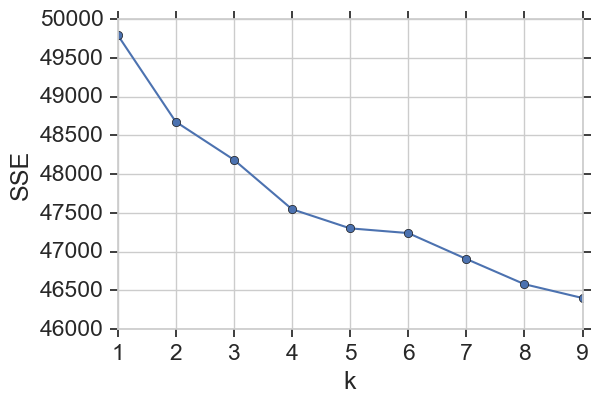

In [120]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

 
df_features = pd.DataFrame(new_data)
max_iterations = 300
SSE = []  
for k in range(1,10):
    print (k)
    estimator = KMeans(n_clusters=k,max_iter=max_iterations).fit(df_features)
    #estimator = clustering_model() 
    SSE.append(estimator.inertia_)
X = range(1,10)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

#kmeans_model = KMeans(n_clusters=5).fit(X)
#for i, l in enumerate(kmeans_model.labels_):
#    print (i , l)


In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_features = pd.DataFrame(new_data)
max_iterations = 300
model = KMeans(n_clusters=5,max_iter=max_iterations).fit(df_features)
#简单打印结果

r1 = pd.Series(model.labels_).value_counts() #统计各个类别的数目

r2 = pd.DataFrame(model.cluster_centers_) #找出聚类中心

r = pd.concat([r2, r1], axis = 1) #横向连接(0是纵向), 得到聚类中心对应的类别下的数目

r.columns = list(df_features.columns) + [u'类别数目'] #重命名表头

#print(r)

#详细输出原始数据及其类别

r = pd.concat([df_features, pd.Series(model.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别

r.columns = list(df_features.columns) + [u'聚类类别'] #重命名表头

r.to_csv('cluster.csv', sep='\t', encoding='utf-8') #保存结果
group = [[],[],[],[],[]]
for i, l in enumerate(model.labels_):
    group[l].append(corpus[i])
    #print (i , l)

In [13]:
print (corpus[100])

151got x urban decay stuff going quickly makeup enthusiasts want grab couldnt get 


In [14]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

def get_WordCloud(corpus):
    df = corpus

    comment_words = ' '
    stopwords = set(STOPWORDS)

    
    for val in corpus:

        # typecaste each val to string 
        val = str(val)
        
        # split the value 
        tokens = val.split()
        comment_words = ' '
        # Converts each token into lowercase 
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        for words in tokens:
            if words[0].isdigit():
                continue
            comment_words = comment_words + words + ' '

    wordcloud = WordCloud(width=800, height=800,
                          stopwords = stopwords,
                          background_color='white',
                          min_font_size=10).generate(comment_words)

    # plot the WordCloud image					 
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show() 





In [77]:
with open('walmart.txt', 'a') as wal:
    for w in group[2]:
        wal.write(w)
        wal.write('\n')


4503


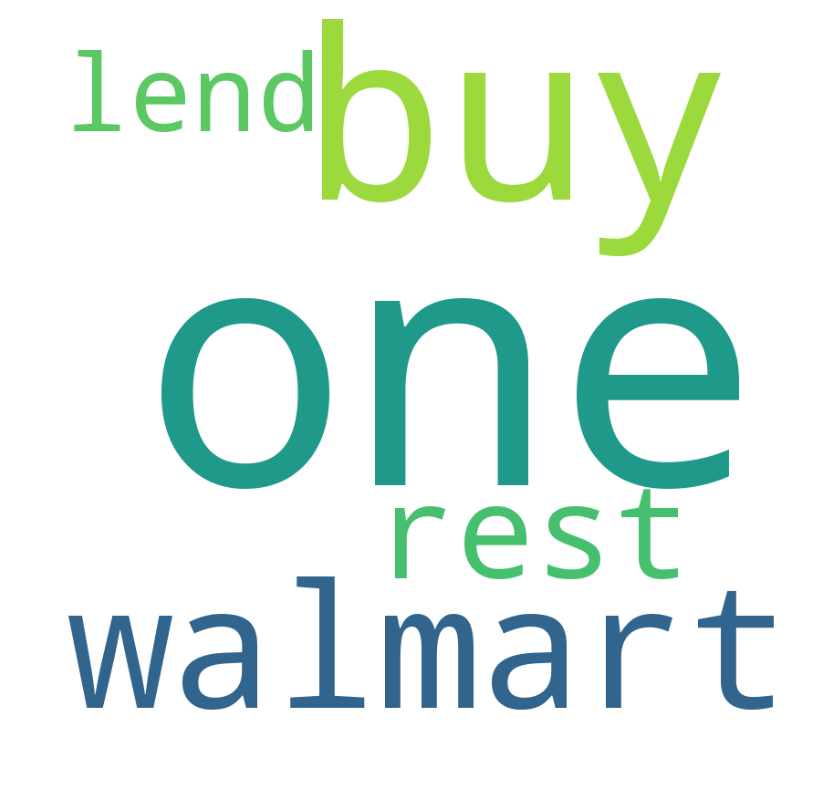

432


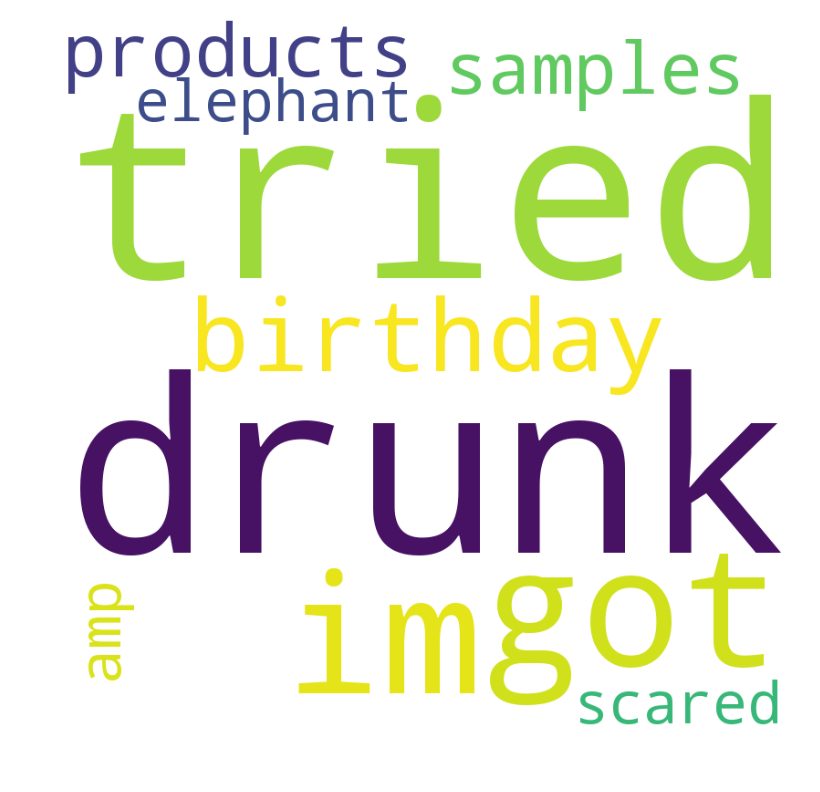

32


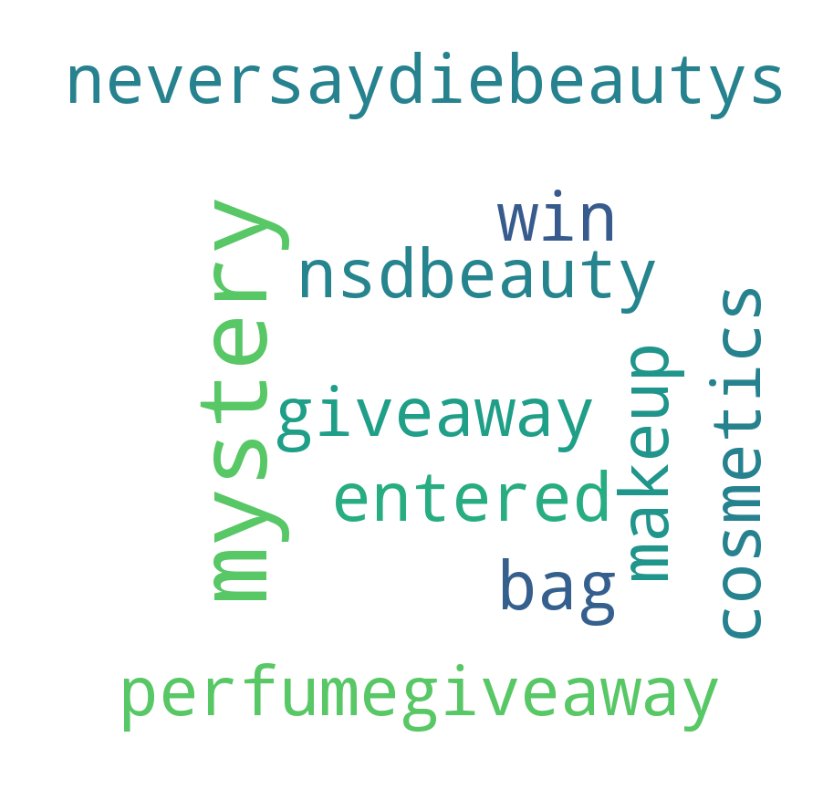

609


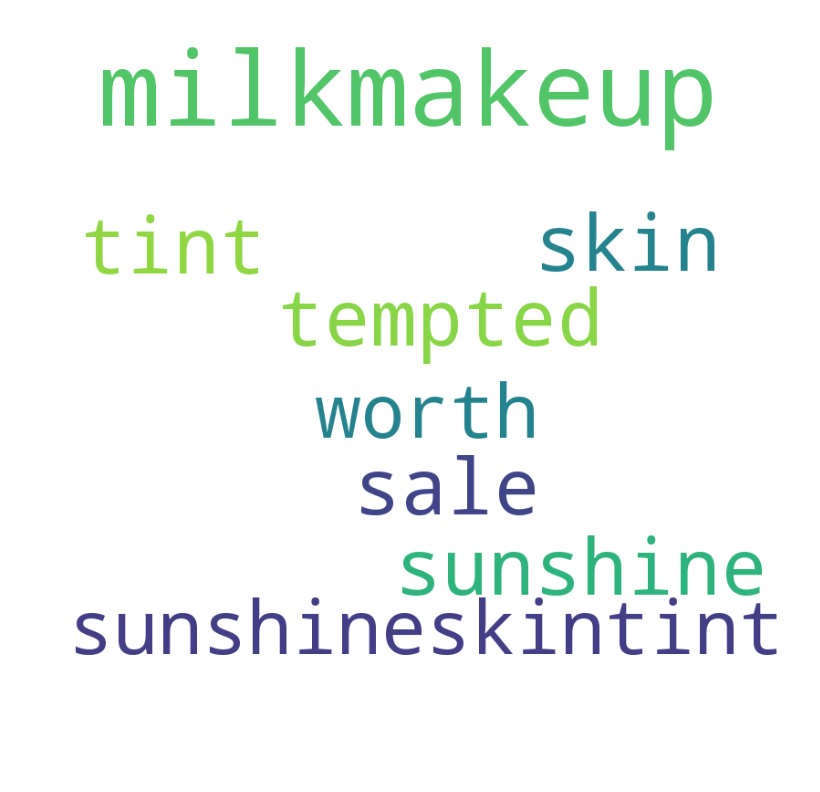

121


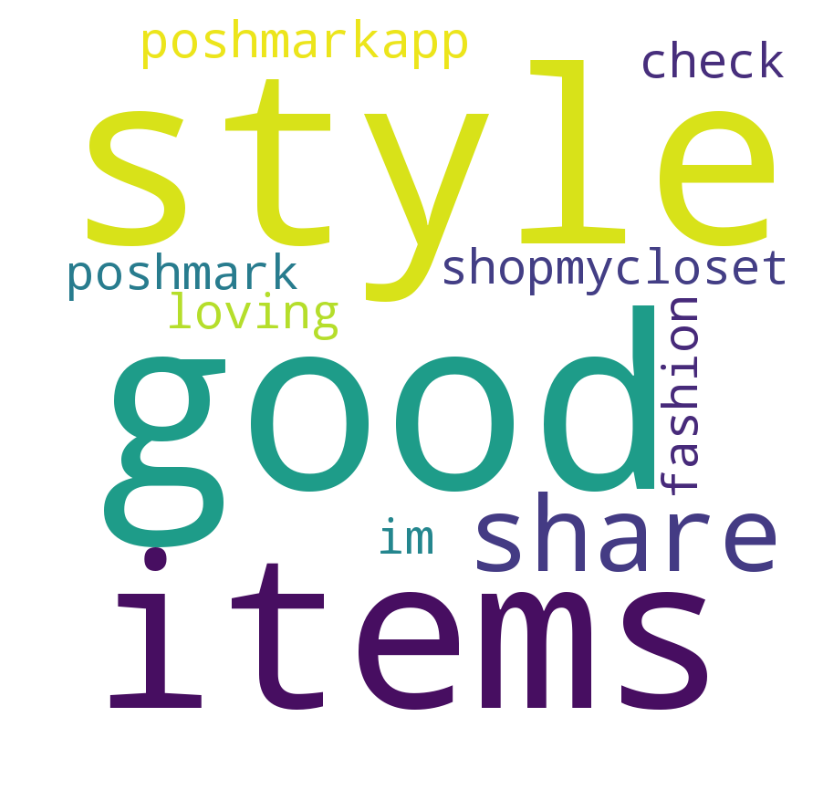

In [15]:
for i in range(0,5):
    words = group[i]
    print (len(words))
    get_WordCloud(words)

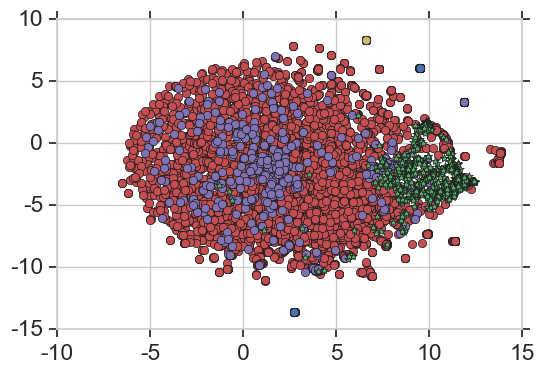

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(df_features) #进行数据降维
tsne = pd.DataFrame(tsne.embedding_, index = df_features.index) #转换数据格式
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
#不同类别用不同颜色和样式绘图
d = tsne[r[u'聚类类别'] == 0]
plt.plot(d[0], d[1], 'ro')
d = tsne[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'mo')
d = tsne[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'yo')
d = tsne[r[u'聚类类别'] == 3]
plt.plot(d[0], d[1], 'g*')
d = tsne[r[u'聚类类别'] == 4]
plt.plot(d[0], d[1], 'bo')
#d = tsne[r[u'聚类类别'] == 5]
#plt.plot(d[0], d[1], 'yo')
#d = tsne[r[u'聚类类别'] == 6]
#plt.plot(d[0], d[1], 'mo')




plt.show()